In [1]:
savepath = "/home/ribeirop/common/Projects/tpot_digen_paper1/AutoML_Results_HPC"
save_figs_folder = "Figures_retested"
tpot_h2o_retested_results_file = 'tpot_retest_results.csv'
autosklearn_retested_results_file = 'retest_results.csv'

import os 

if save_figs_folder is not None:
    if not os.path.exists(save_figs_folder):
        os.makedirs(save_figs_folder)

#ascending=True means that small values are ranked higher

import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 40)
import seaborn as sns
import matplotlib.pyplot as plt
import dill as pickle
import digen
import os
import glob

from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
def make_parallel_coordinates_plot(df, index, columns, values, ax=None):
    df_piv = df.pivot(index=index, columns=columns, values=values).reset_index(level=0)
    df_piv.set_index("dataset", drop=False, inplace=True)

    ax = pd.plotting.parallel_coordinates(df_piv, "dataset",
                                        cols=list(reversed(df_piv.mean(0).sort_values().index.to_list())),
                                        color='black',
                                        #colormap='turbo',
                                        alpha=1,
                                        ax=ax)

    #            plt.title("Performance of classifiers compared vs the method on DIGEN benchmark", fontsize=28)
    ax.set_ylabel(values, fontsize=24)

    #        ax.set_xticks(np.arange(0.0, 1.1, step=0.1))
    #ax.set_xlabel("Classifiers", fontsize=24)

    # ax.set_yticks(np.arange(-0.1, .5, step=0.1))
    ax.tick_params(axis='both', which='major', labelsize=20)

    #plt.plot([0, 6], [0, 0], color='red', linestyle='--', linewidth=4)
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)
    plt.xticks(rotation=90)
    return ax


benchmark=digen.Benchmark()
datasets_names = benchmark.list_datasets()

def make_df(results_arr):
    all_df = pd.DataFrame()
    z = pd.DataFrame.from_dict(results_arr).transpose()
    z.drop('name', inplace=True)
    z['pipeline'] = z['classifier']
    #z['classifier'] = "{0}_{1}".format(new_results['name'],i)
    z['classifier'] =  results_arr['name']
    all_df = all_df.append(z)
    all_df.reset_index(inplace=True)
    return all_df

palette = {   
                'TPOT_C'   :   "#DE8F05" ,
                'TPOT_STC'  :    "#029E73",
                'TPOT_Base'    :   "#D55E00" ,

                'Auto-Sklearn'   :   "#FBAFE4",
                'Auto-Sklearn 2':   "#CC78BC",

                'H2O':   "#0173B2",

                'MLPClassifier':   "#b4acc5",
                'XGBClassifier':   "#b4acc5",
                'GradientBoostingClassifier':   "#b4acc5",
                'LGBMClassifier':   "#b4acc5",
                'SVC':   "#b4acc5",
                'RandomForestClassifier':   "#b4acc5",
                'KNeighborsClassifier':   "#b4acc5",
                'DecisionTreeClassifier':   "#b4acc5",
                'LogisticRegression':   "#b4acc5",
                
                'Best Optuna' : 'black',
}





def make_df(results_arr):
    all_df = pd.DataFrame()
    z = pd.DataFrame.from_dict(results_arr).transpose()
    z.drop('name', inplace=True)
    z['pipeline'] = z['classifier']
    #z['classifier'] = "{0}_{1}".format(new_results['name'],i)
    z['classifier'] =  results_arr['name']
    all_df = all_df.append(z)
    all_df.reset_index(inplace=True)
    return all_df

palette = {   
                'TPOT_C'   :   "#DE8F05" ,
                'TPOT_STC'  :    "#029E73",
                'TPOT_Base'    :   "#D55E00" ,

                'Auto-Sklearn'   :   "#FBAFE4",
                'Auto-Sklearn 2':   "#CC78BC",

                'H2O':   "#0173B2",

                'MLPClassifier':   "#b4acc5",
                'XGBClassifier':   "#b4acc5",
                'GradientBoostingClassifier':   "#b4acc5",
                'LGBMClassifier':   "#b4acc5",
                'SVC':   "#b4acc5",
                'RandomForestClassifier':   "#b4acc5",
                'KNeighborsClassifier':   "#b4acc5",
                'DecisionTreeClassifier':   "#b4acc5",
                'LogisticRegression':   "#b4acc5",
                
                'Best Optuna' : 'black',
}



automl_experiments = [

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_STC_1200s',
                    
                    },

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_C_1200s',

                    },

                    

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_base_1200s',
                    
                    },

                    {
                    'automl': 'h2o',
                    'exp_name' : 'h2o_1200s',
                    },


                    {
                    'automl': 'autosklearn',
                    'exp_name' : 'autosklearn_1200s',
                    
                    },

                    {
                    'automl': 'autosklearn2',
                    'exp_name' : 'autosklearn2_1200s',
                    
                    },

                                        {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_STC_3600s',
                    
                    },

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_C_3600s',

                    },

                    

                    {
                    'automl': 'tpot',
                    'exp_name' : 'tpot_base_3600s',
                    
                    },

                    {
                    'automl': 'h2o_old',
                    'exp_name' : 'h2o_3600s',
                    },


                    {
                    'automl': 'autosklearn',
                    'exp_name' : 'autosklearn_3600s',
                    
                    },

                    {
                    'automl': 'autosklearn2',
                    'exp_name' : 'autosklearn2_3600s',
                    
                    },

        ]

#Load the Results
def load_results(results_files_paths, name=None):
    results_arr = []
    for i,results_file in enumerate(results_files_paths):
        if os.path.exists(os.path.join(results_file,"results.pkl")):
            results=pickle.load(open(os.path.join(results_file,"results.pkl"),"rb"))
            
            results_arr.append(results)
    
    return results_arr



all_results_dict = {}
for exp in automl_experiments:
    results_arr= load_results(sorted(glob.glob(os.path.join(savepath,"digen_results",exp["automl"],exp["exp_name"],"**"))),exp["exp_name"] )
    #for result in results_arr:
    #    result['name'] = exp["exp_name"]
    #all_results_dict[exp["exp_name"]] = results_arr
    exp_name = exp["exp_name"]
    for result in results_arr:
        result['name'] = exp_name
    all_results_dict[exp_name] = results_arr


all_rows = []
for exp in list(all_results_dict.keys()):
    for run, data in enumerate(all_results_dict[exp]):
        for dataset in datasets_names:
            r = {"dataset": dataset, "run": run, "exp_name": exp,
                "train_score":data[dataset]['auroc_train'],
                "auroc_original":data[dataset]['auroc'],
                'rec_original':data[dataset]['rec'],
                'prec_original':data[dataset]['prec'],
                'f1_score_original':data[dataset]['f1_score'],
                'auprc_original':data[dataset]['auprc'],
                "duration":data[dataset]['duration'],}
            
            all_rows.append(r)
            
all_df = pd.DataFrame(all_rows)



df1 = pd.read_csv(tpot_h2o_retested_results_file, index_col=0)
df2 = pd.read_csv(autosklearn_retested_results_file, index_col=0)
df = pd.concat([df1,df2], axis=0)

bigger_testset = pickle.load(open("/home/ribeirop/common/Projects/tpot_digen_paper1/automl_digen_benchmark/all_new_test_sets.pkl", "rb"))


noises = []
for dset in bigger_testset.keys():
    noises.append({"dataset":dset, "noise":bigger_testset[dset]['noise']})

noises = pd.DataFrame(noises)

#add a column to df that is equal to (1-noise)-score where the noise is matched by dataset

all_df = all_df.merge(df, on=['dataset', 'exp_name', 'run'], how='left')

convert_names = {
    'tpot_STC_1200s'   : 'TPOT_STC'   ,
    'tpot_C_1200s'    : 'TPOT_C'    ,
    'tpot_base_1200s'   : 'TPOT_Base'   ,
    'h2o_1200s'         : 'H2O'         ,
    'autosklearn_1200s'  : 'Auto-Sklearn'  ,
    'autosklearn2_1200s'  : 'Auto-Sklearn 2'  ,
    'tpot_C_3600s' : 'TPOT_C_3600s', 
    'tpot_STC_3600s' : 'TPOT_STC_3600s',
    'tpot_base_3600s' : 'TPOT_Base_3600s',
    'h2o_3600s':    'H2O_3600s',
    'autosklearn_3600s': 'Auto-Sklearn_3600s',
    'autosklearn2_3600s' : 'Auto-Sklearn2_3600s',
}


palette = {   
                'TPOT_C'   :   "#ff7f00",
                'TPOT_STC'  :    "#4daf4a",
                'TPOT_Base'    :   "#e41a1c",

                'Auto-Sklearn'   :   "#f781bf",
                'Auto-Sklearn 2':   "#984ea3",

                'H2O':   "#377eb8",
}

all_df['exp_name'] = all_df['exp_name'].map(convert_names)

all_df = all_df[all_df['exp_name'].isin(['TPOT_STC', 'TPOT_C', 'TPOT_Base', 'H2O', 'Auto-Sklearn', 'Auto-Sklearn 2',])]

# Paper Figures

Text(0.5, 1.0, 'Best test score across all runs and all algorithms - optimal')

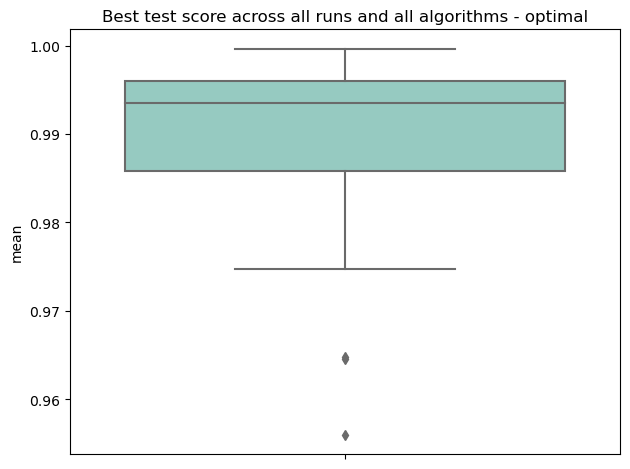

In [3]:
best_overall = all_df.groupby(['dataset'])["auroc_y_no_noise"].describe().reset_index()
best_overall = best_overall.merge(noises, on='dataset')

#boxplot of df_summary max - noise
plt.figure()
ax = sns.boxplot(y="mean", data=best_overall, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#plt.ylabel("AUROC")
plt.title("Best test score across all runs and all algorithms - optimal")

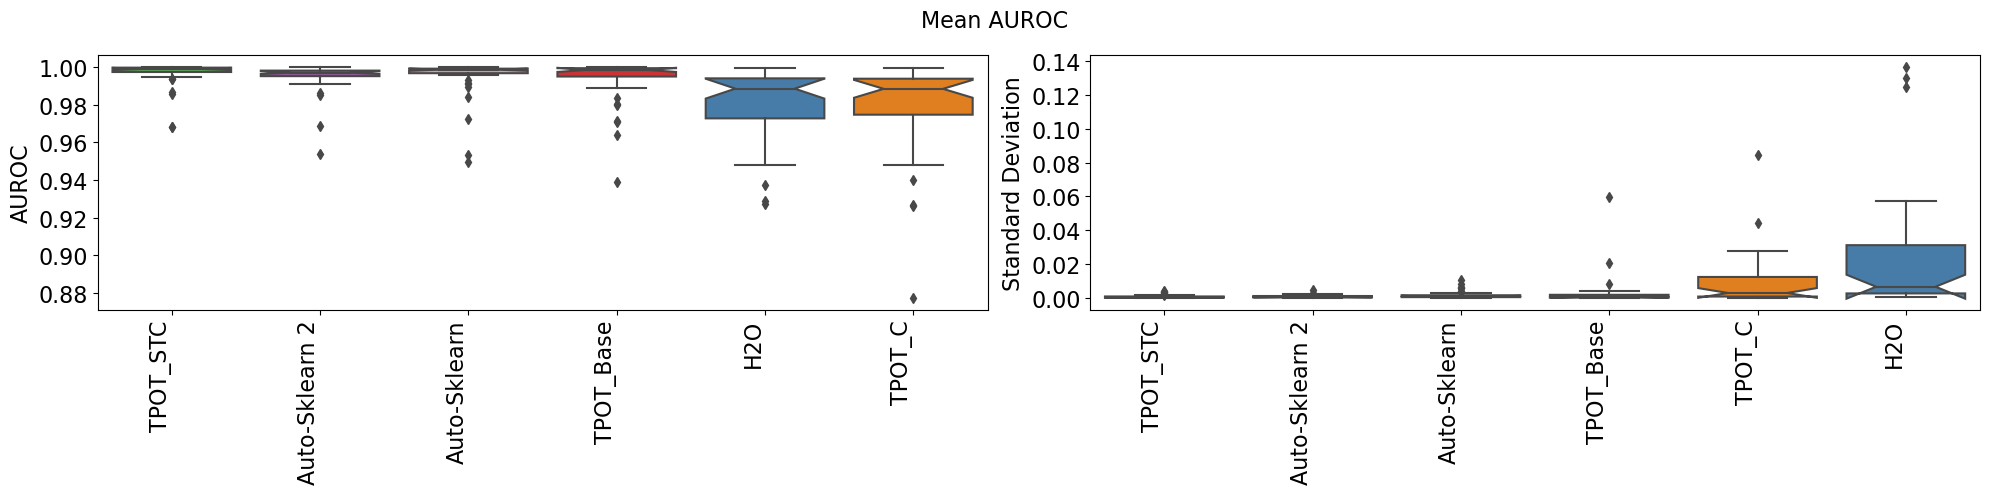

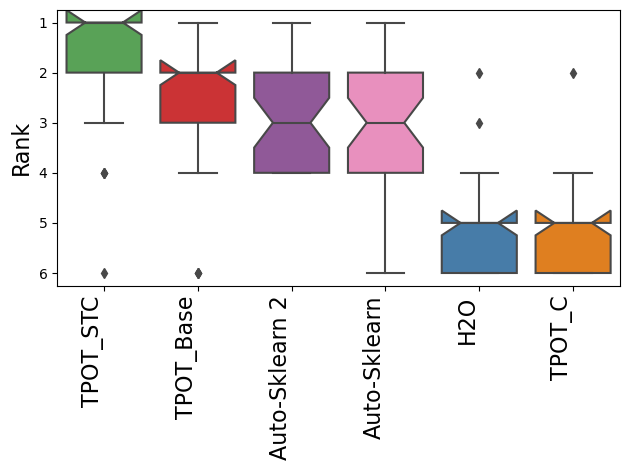

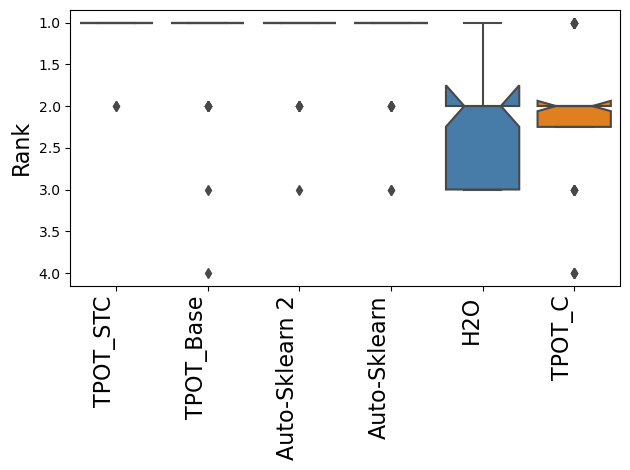

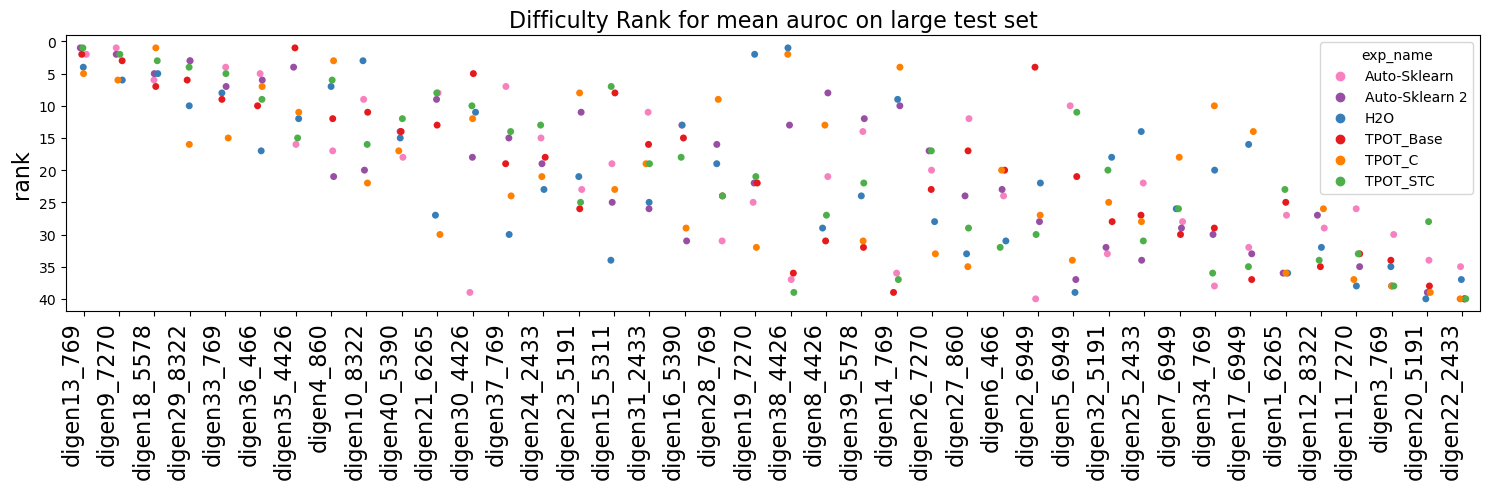

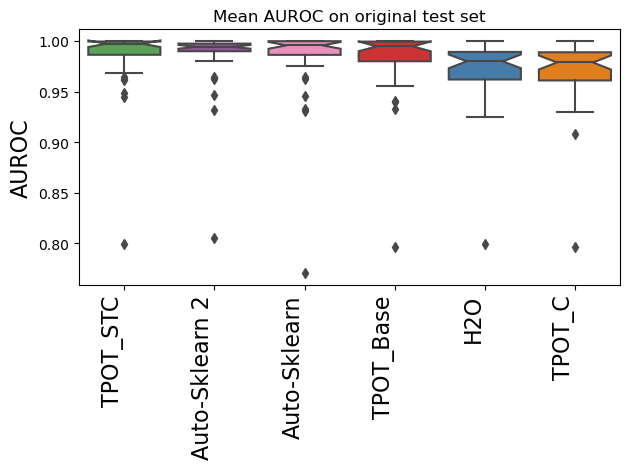

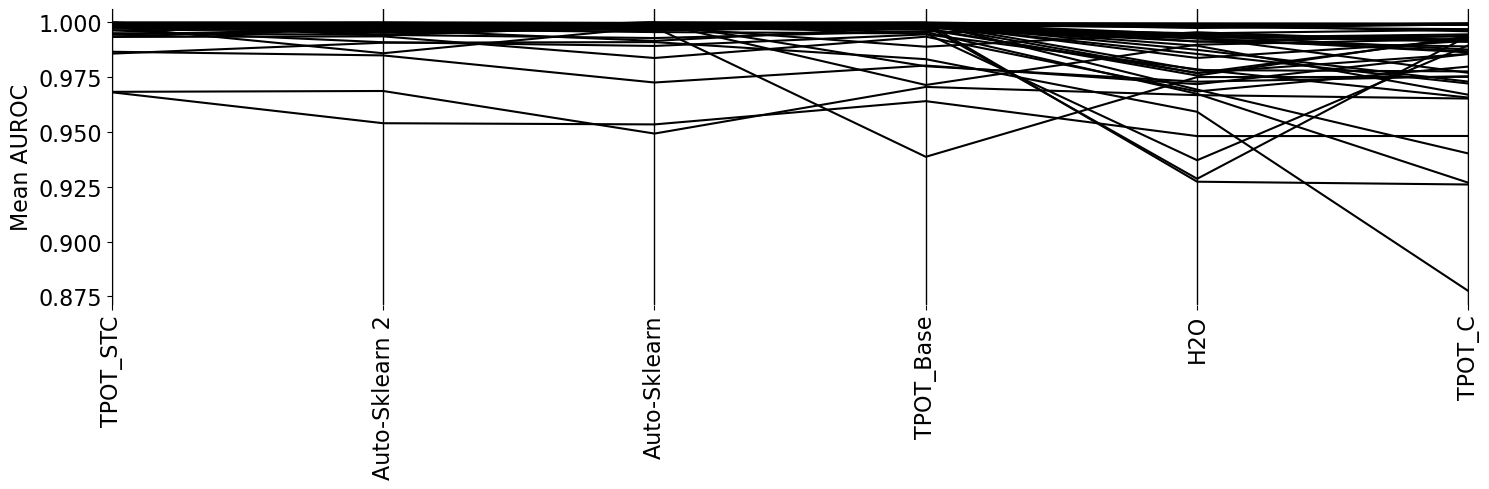

<Figure size 640x480 with 0 Axes>

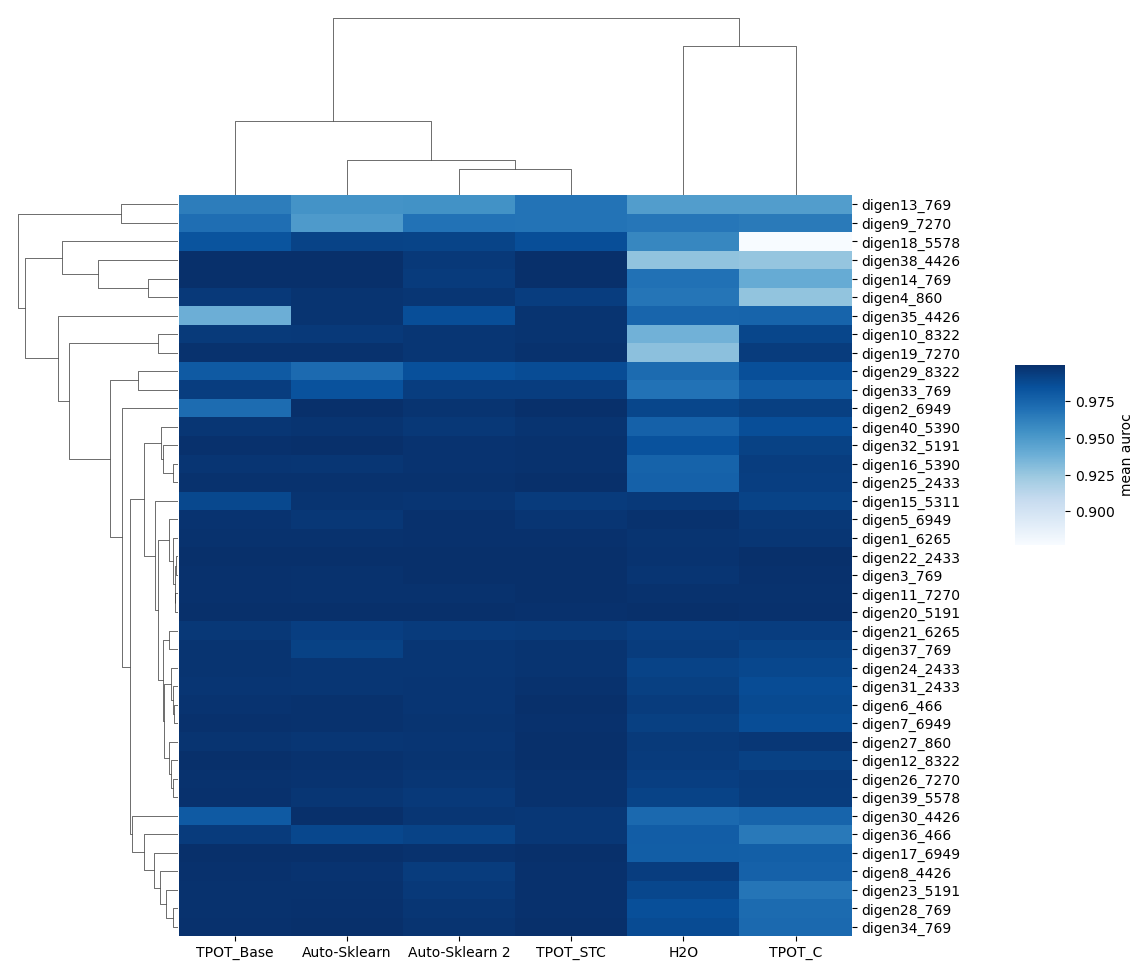

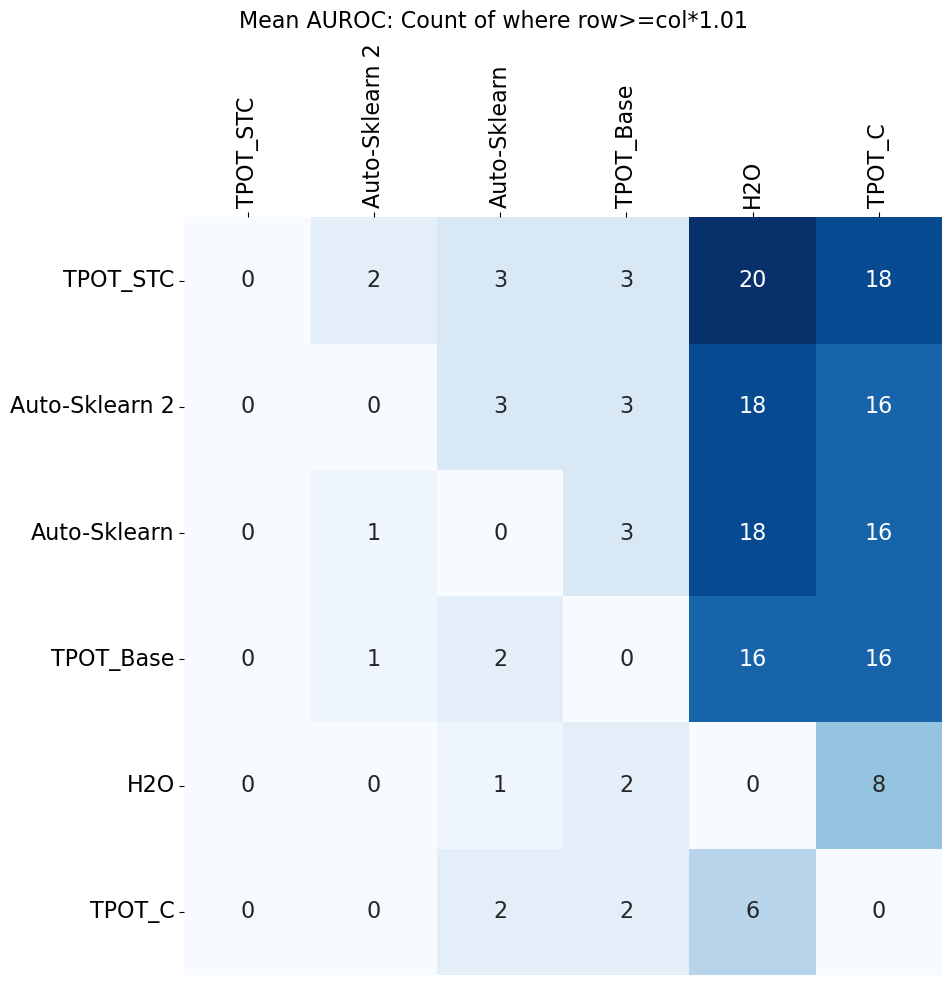

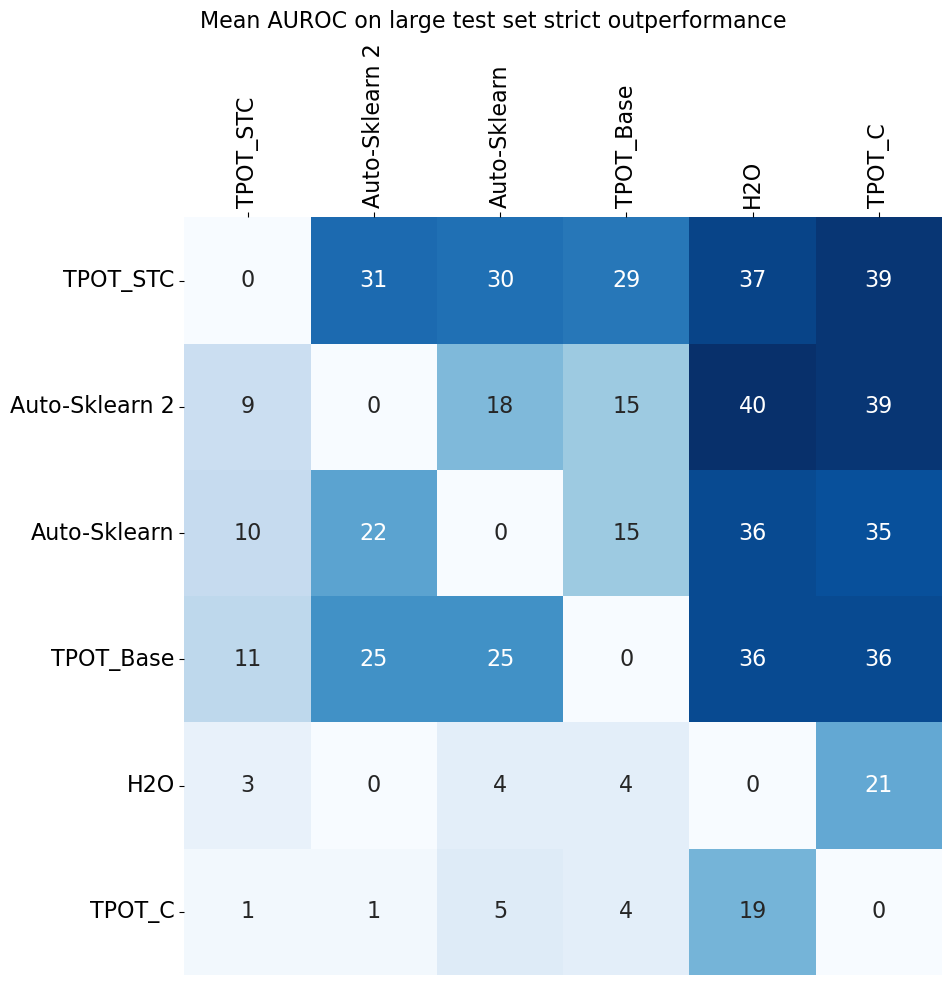

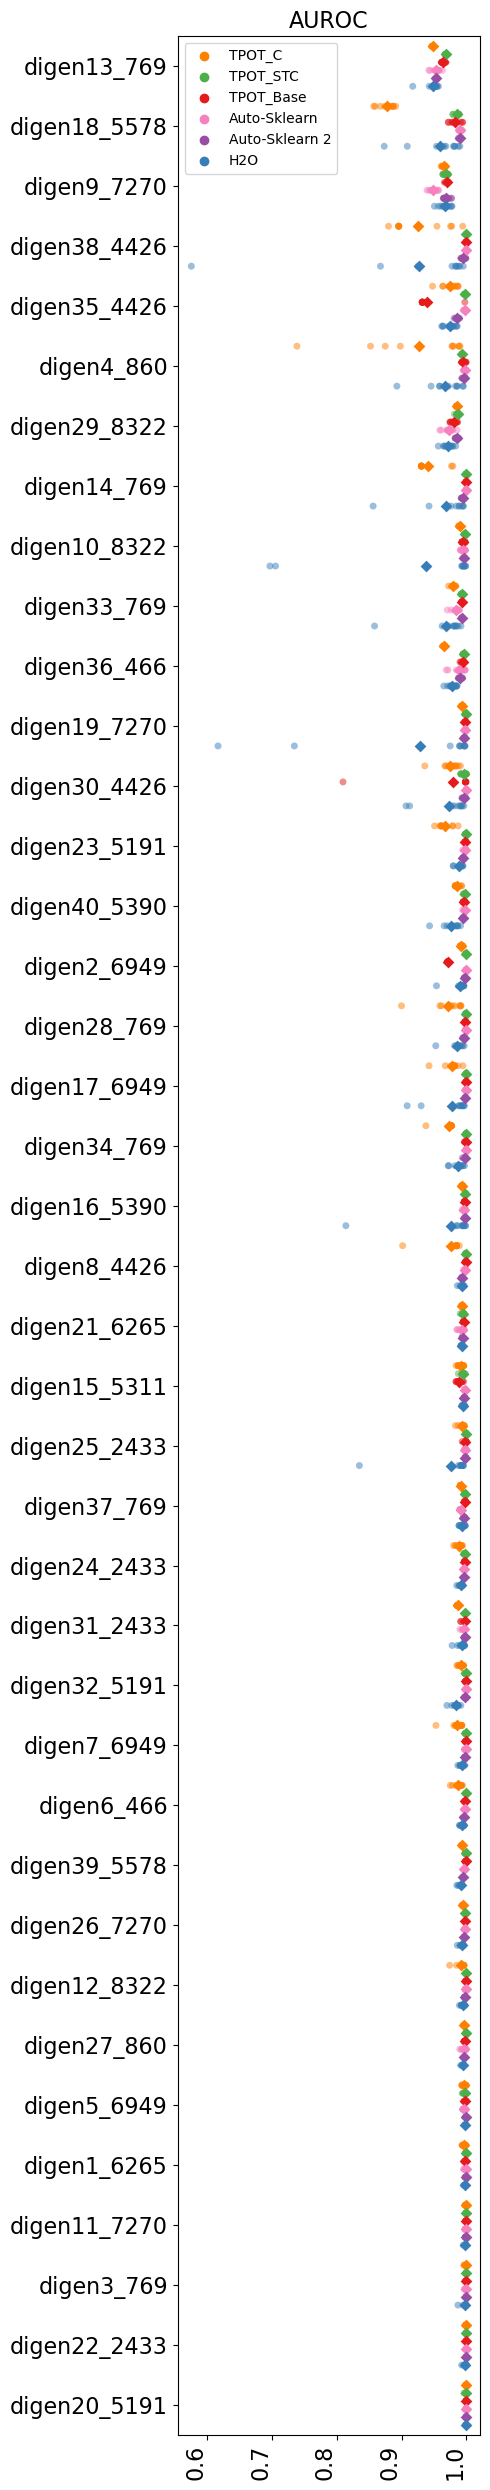

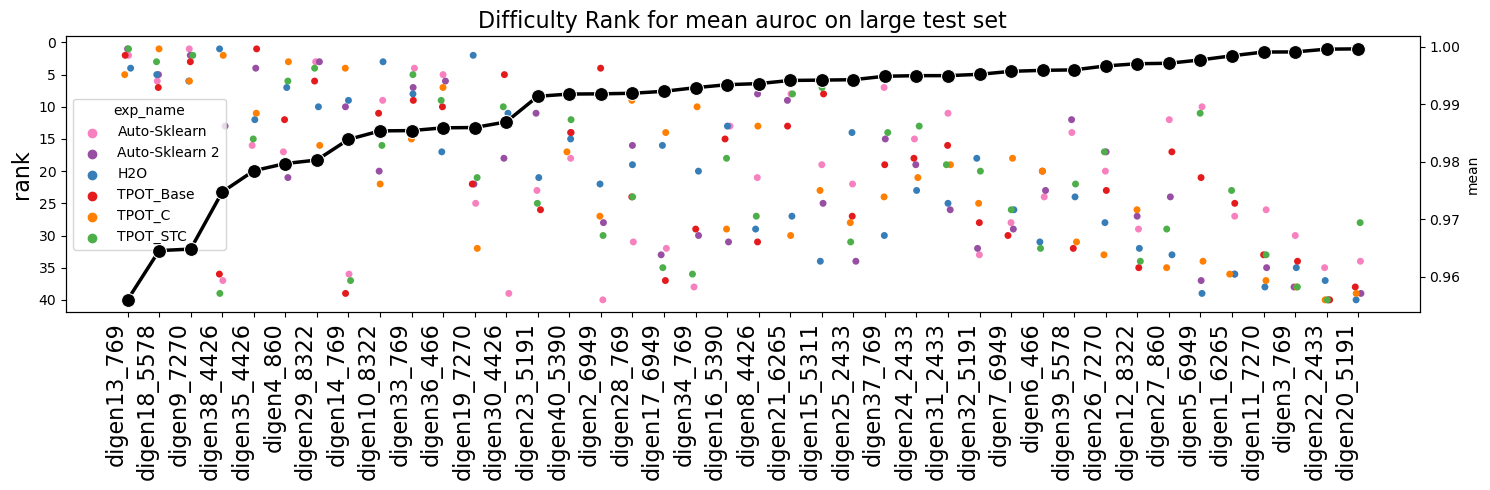

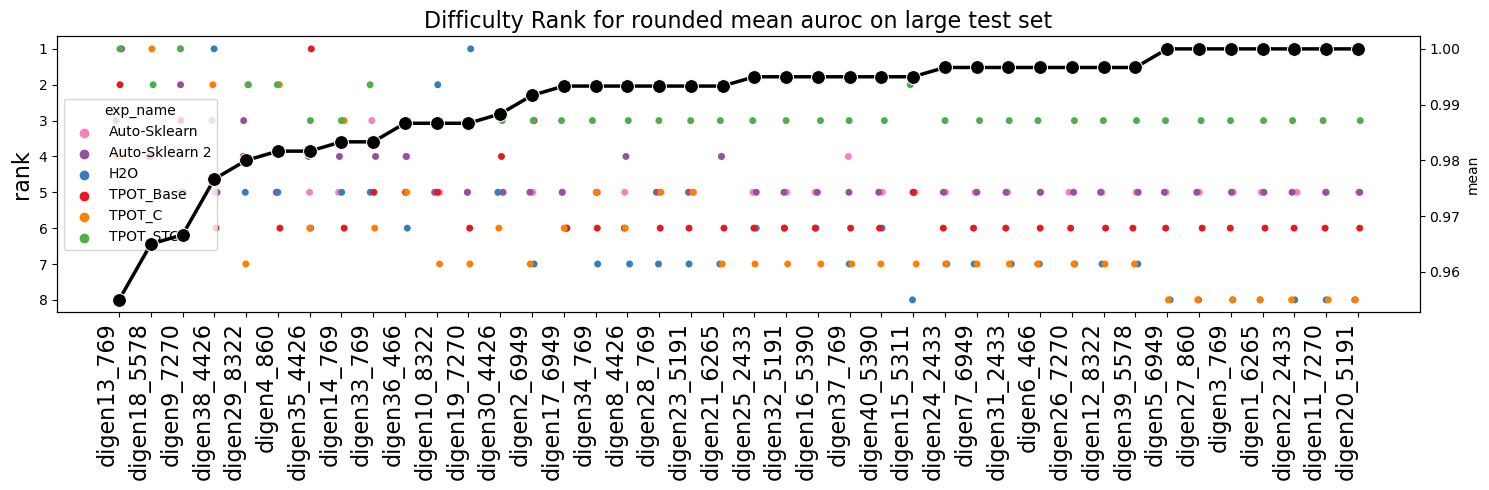

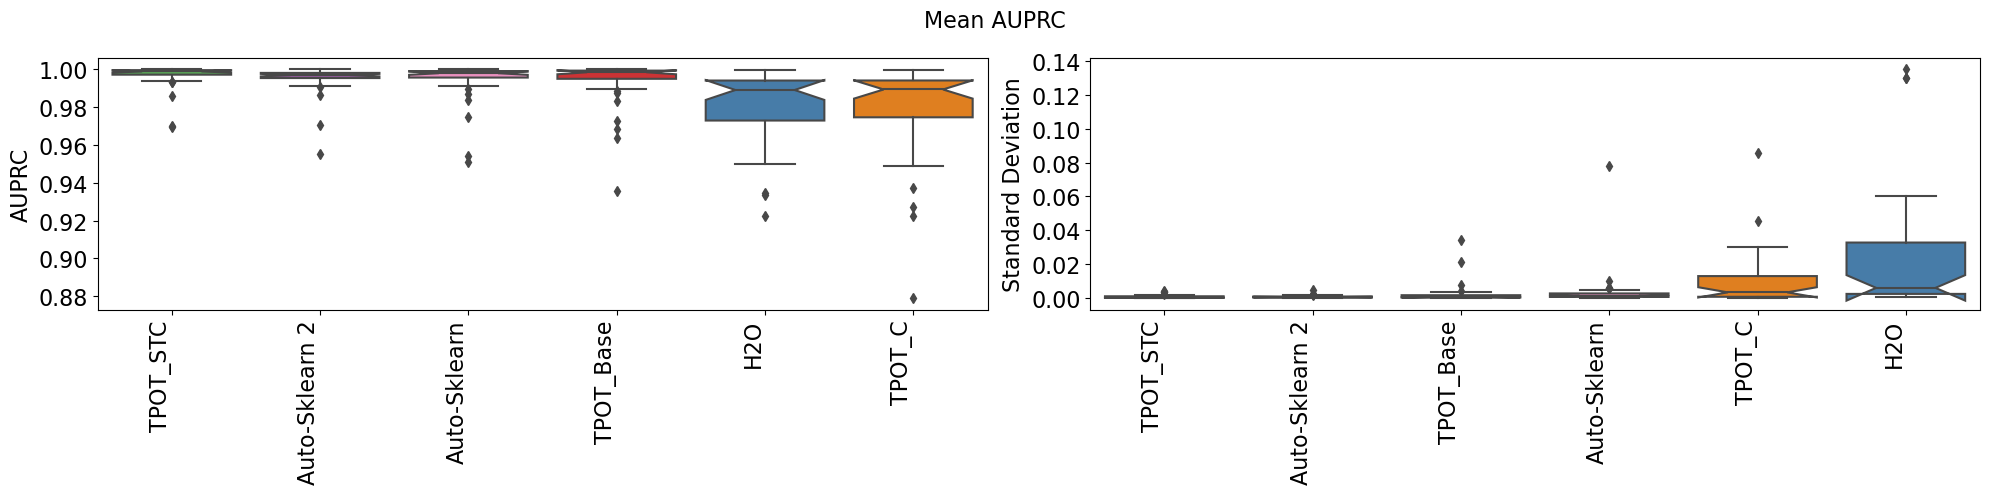

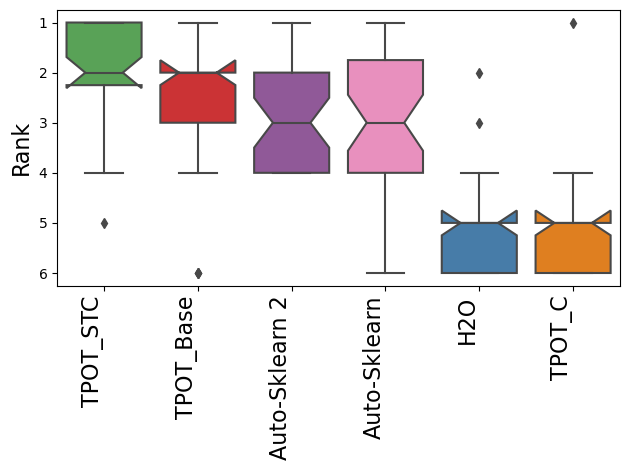

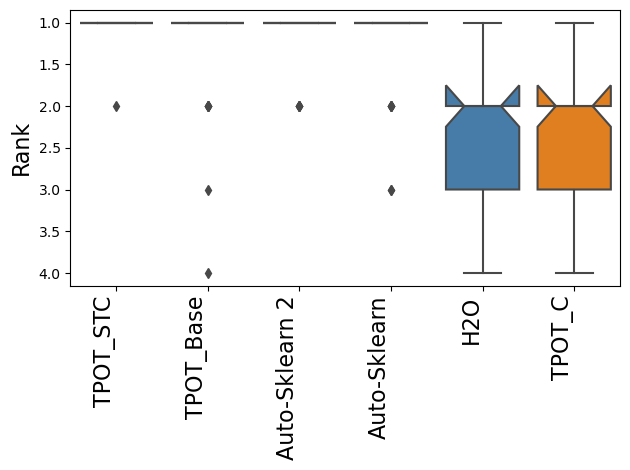

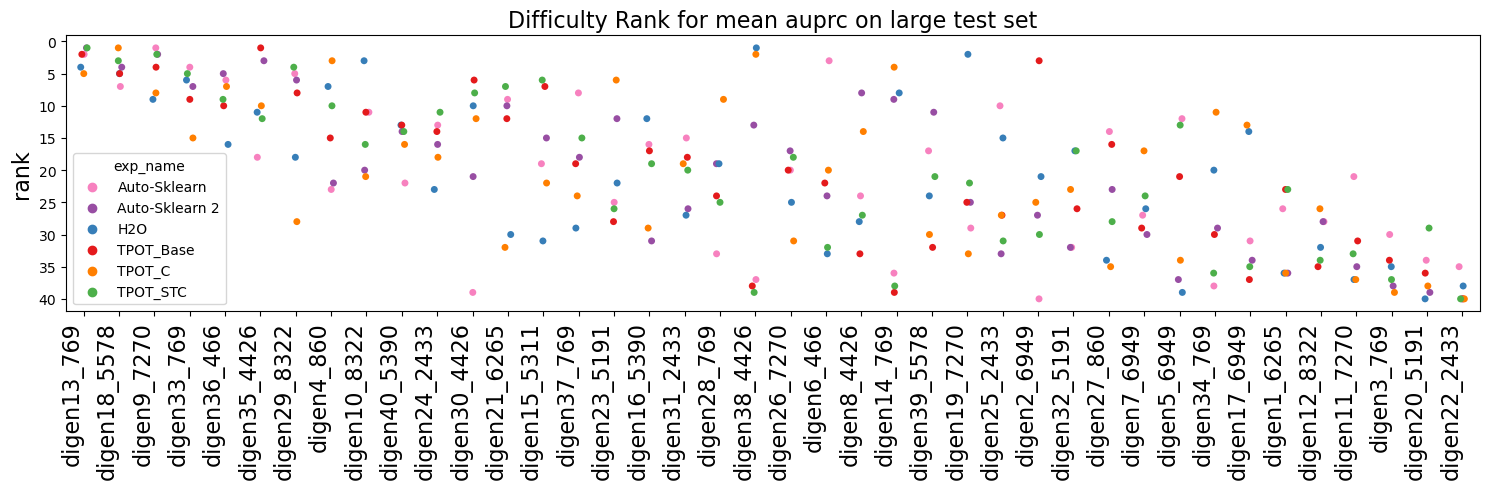

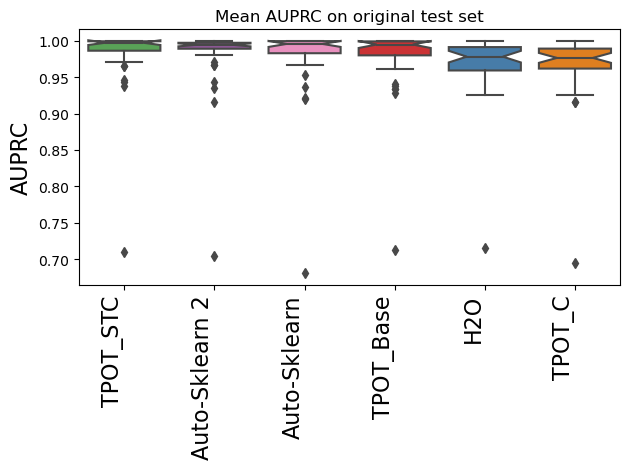

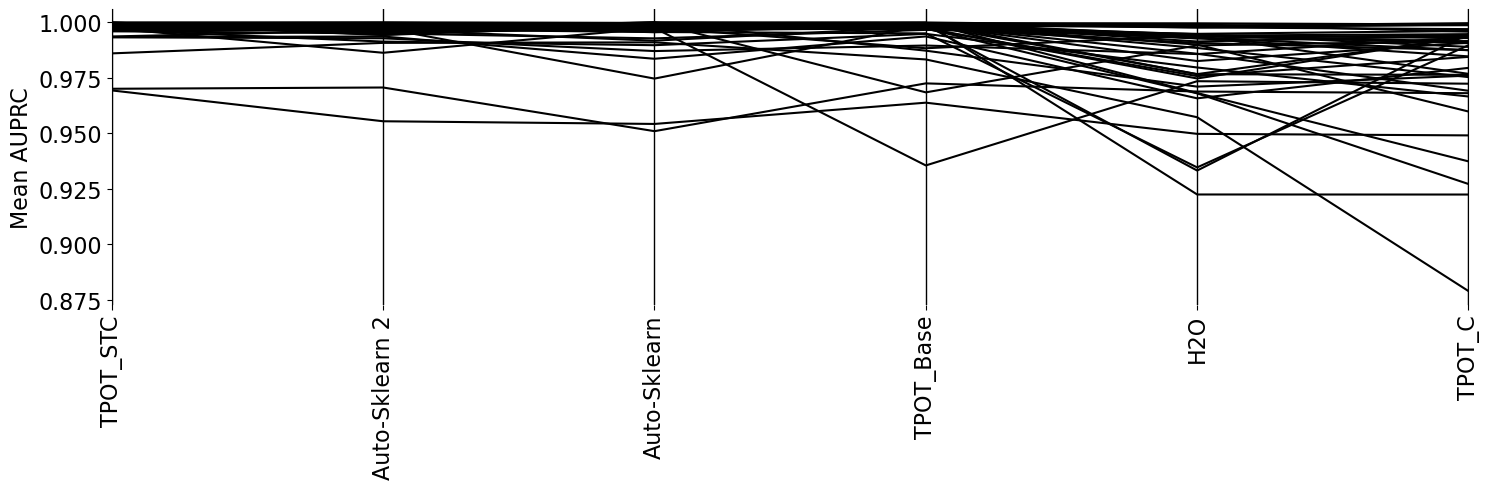

<Figure size 640x480 with 0 Axes>

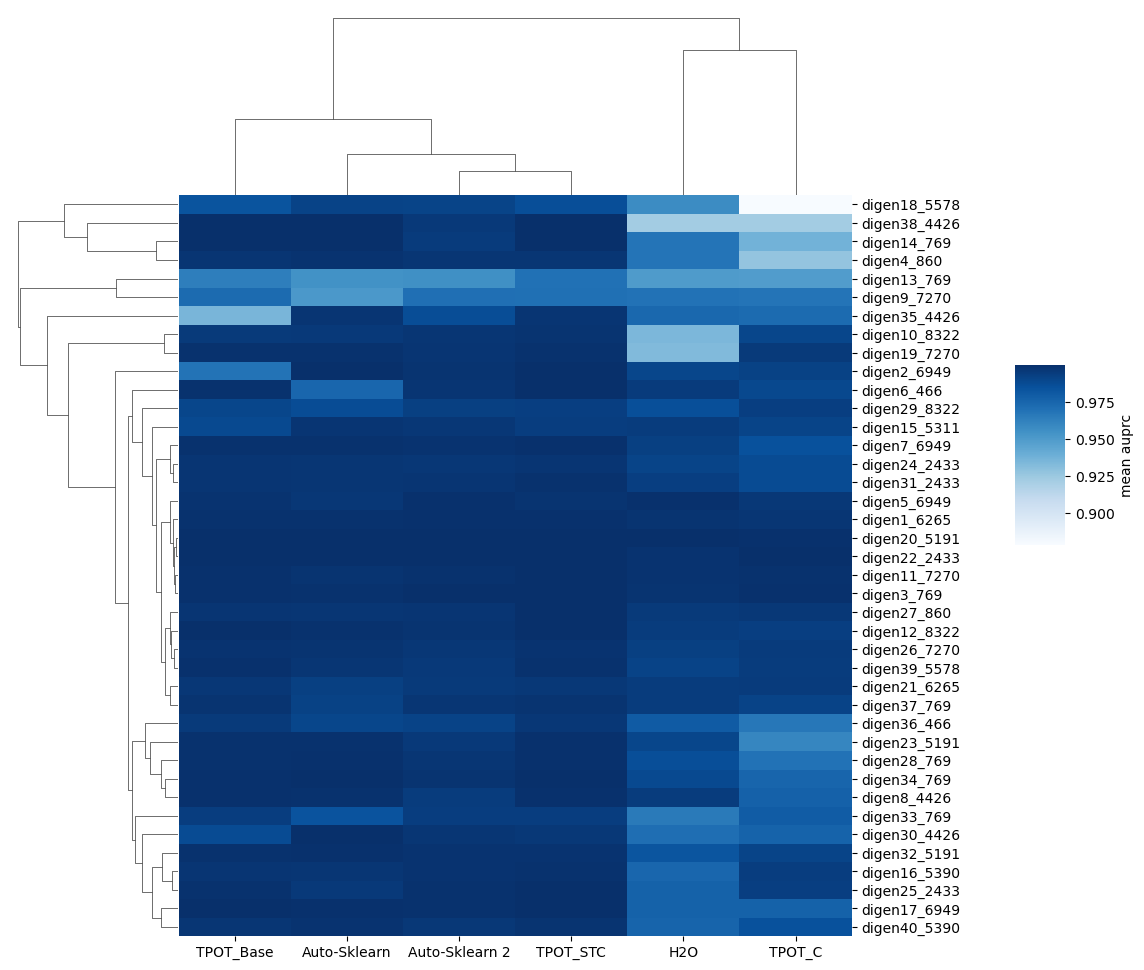

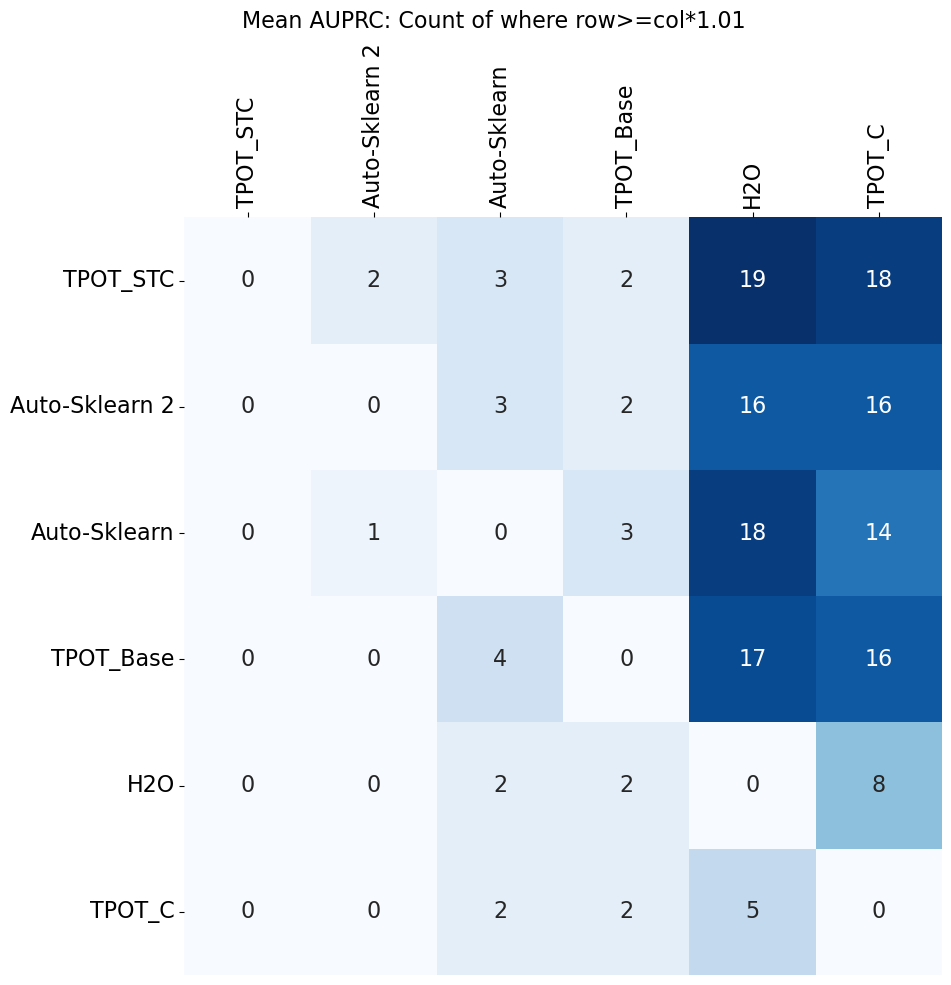

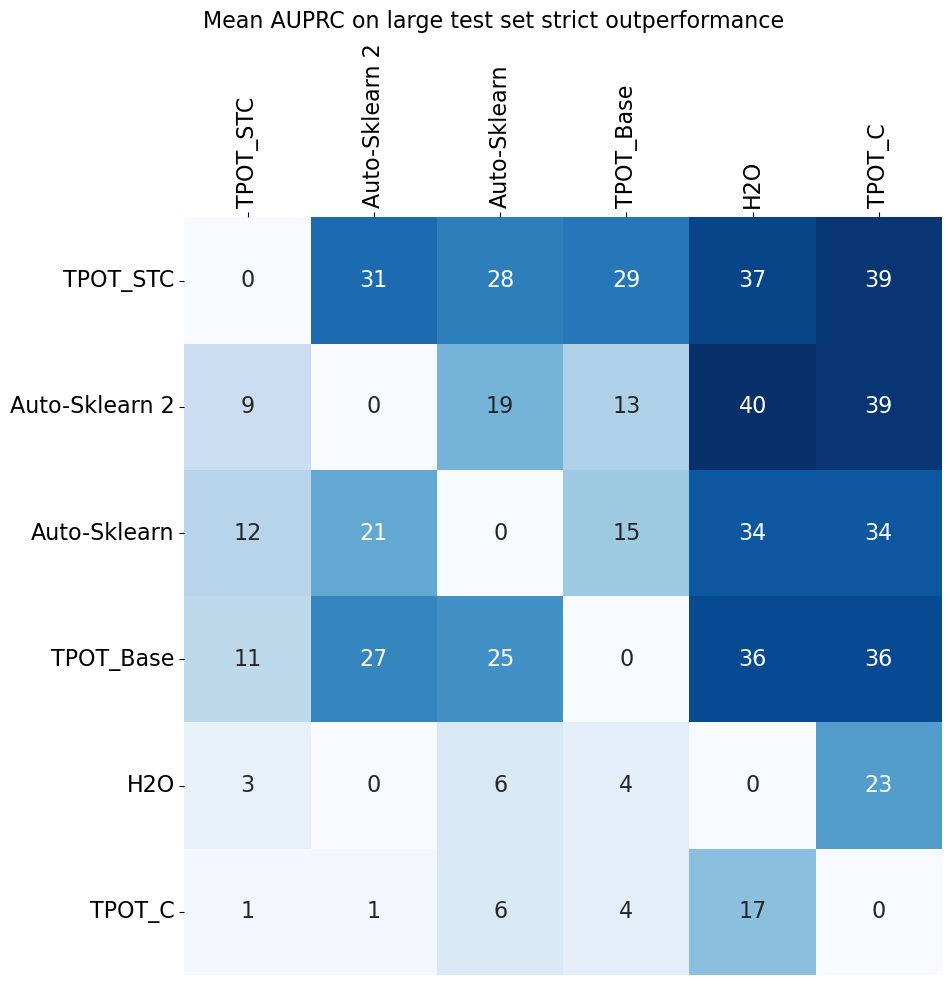

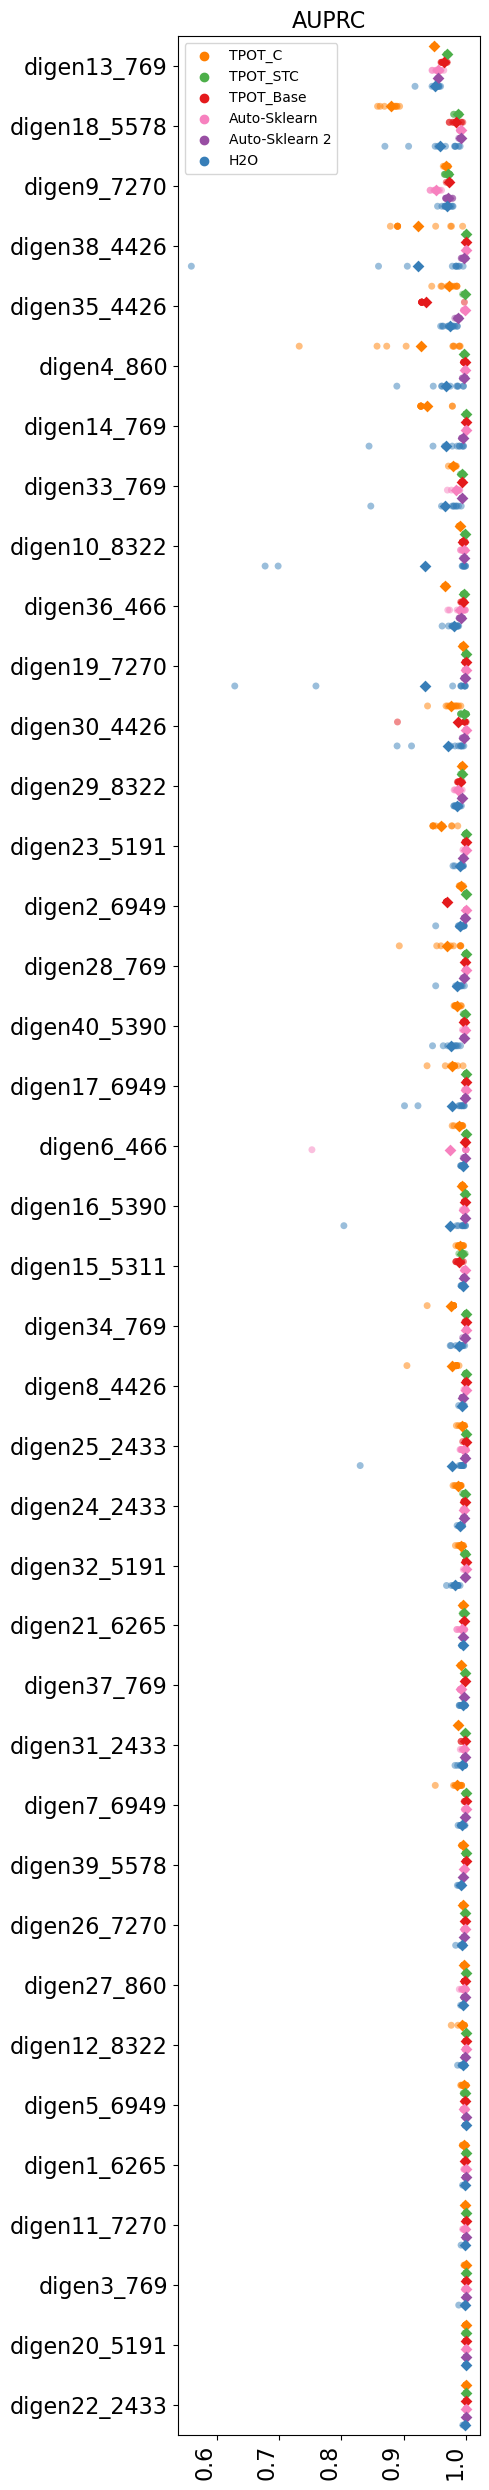

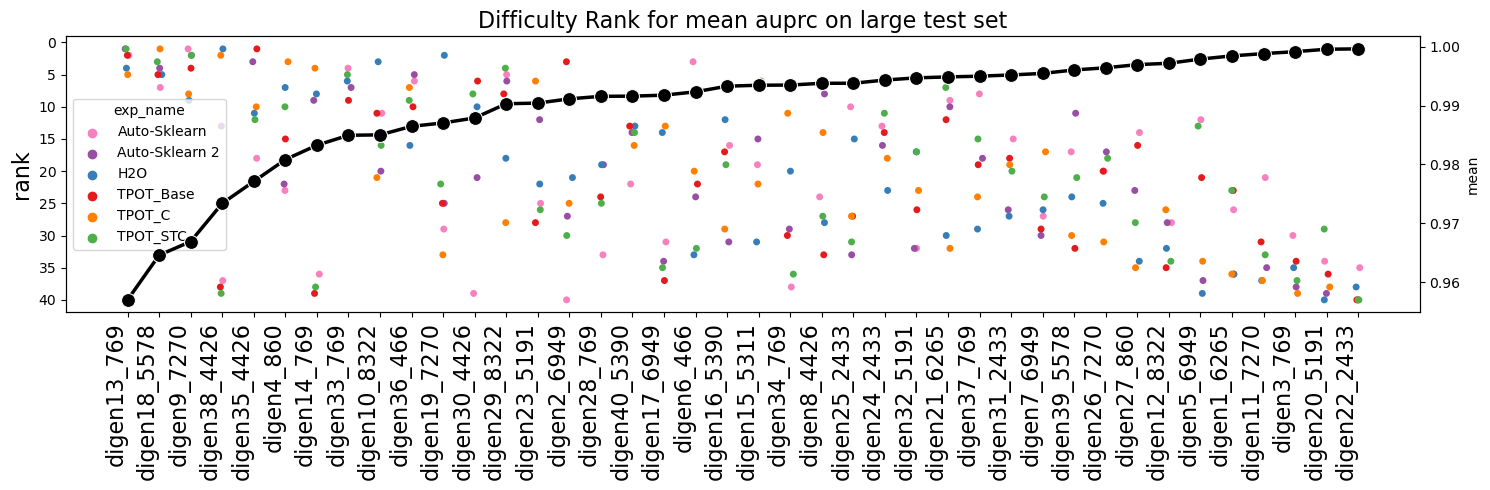

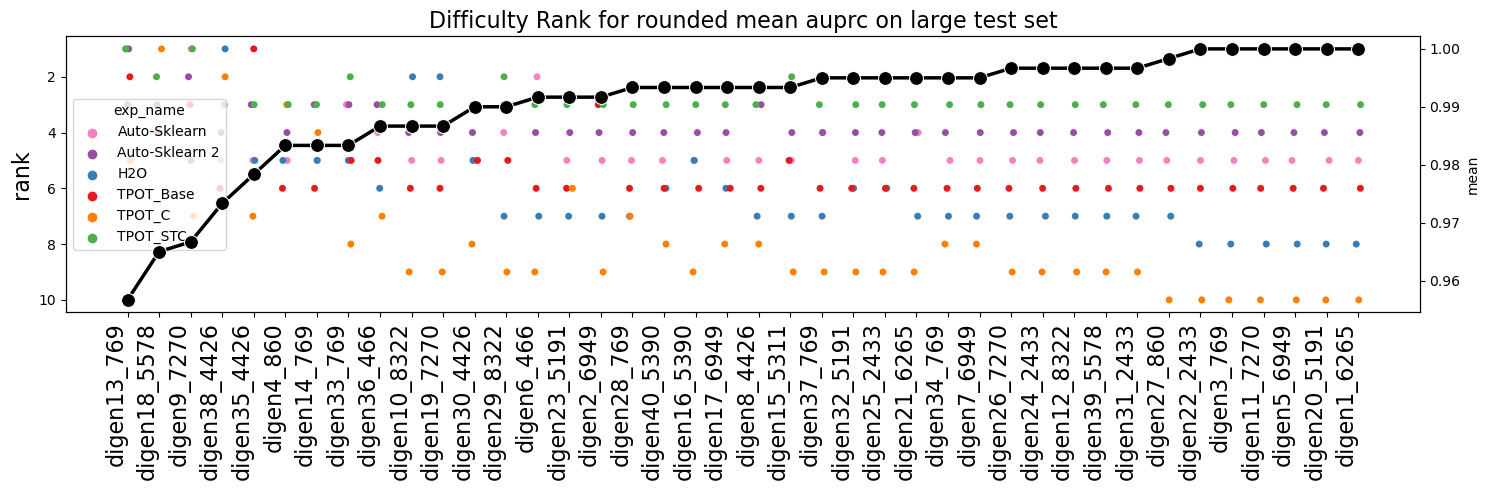

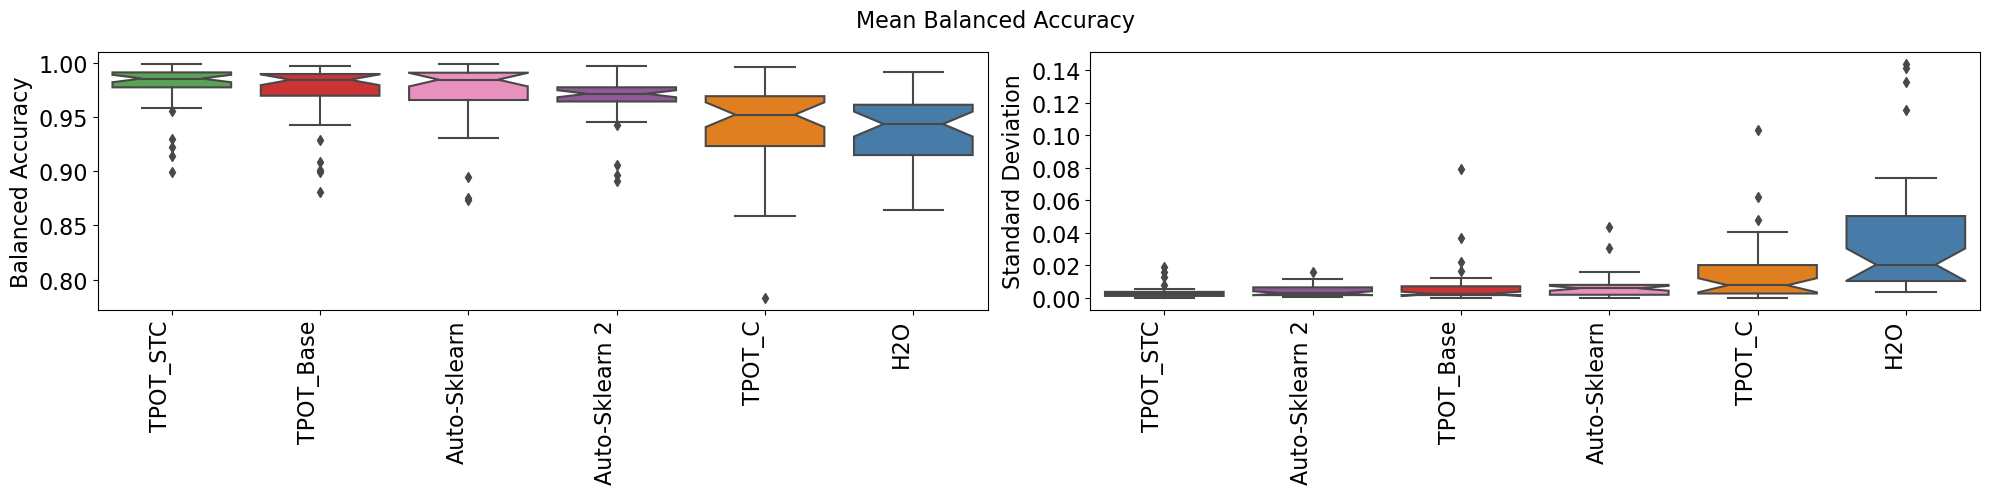

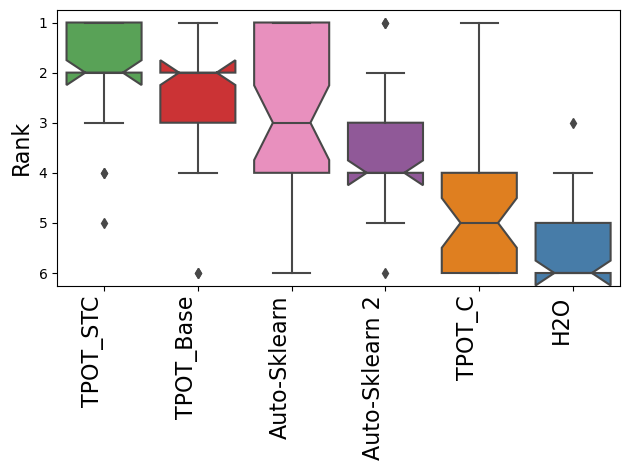

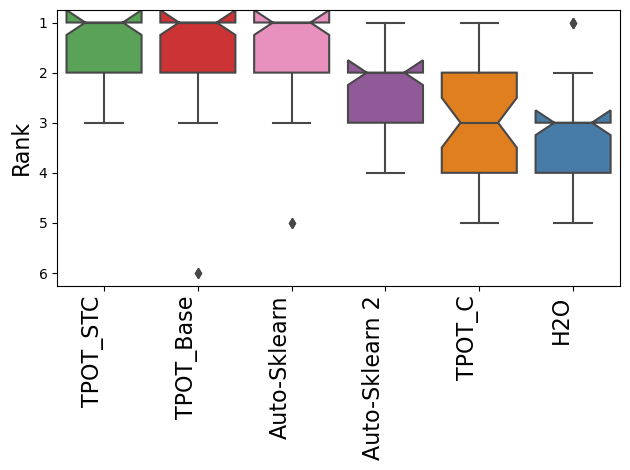

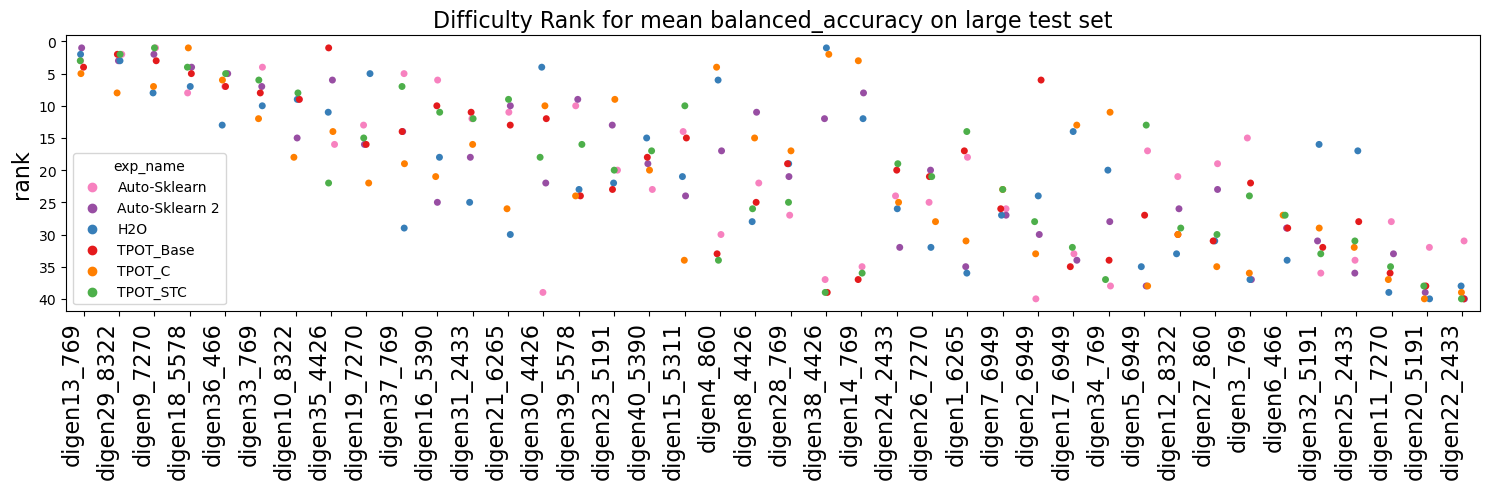

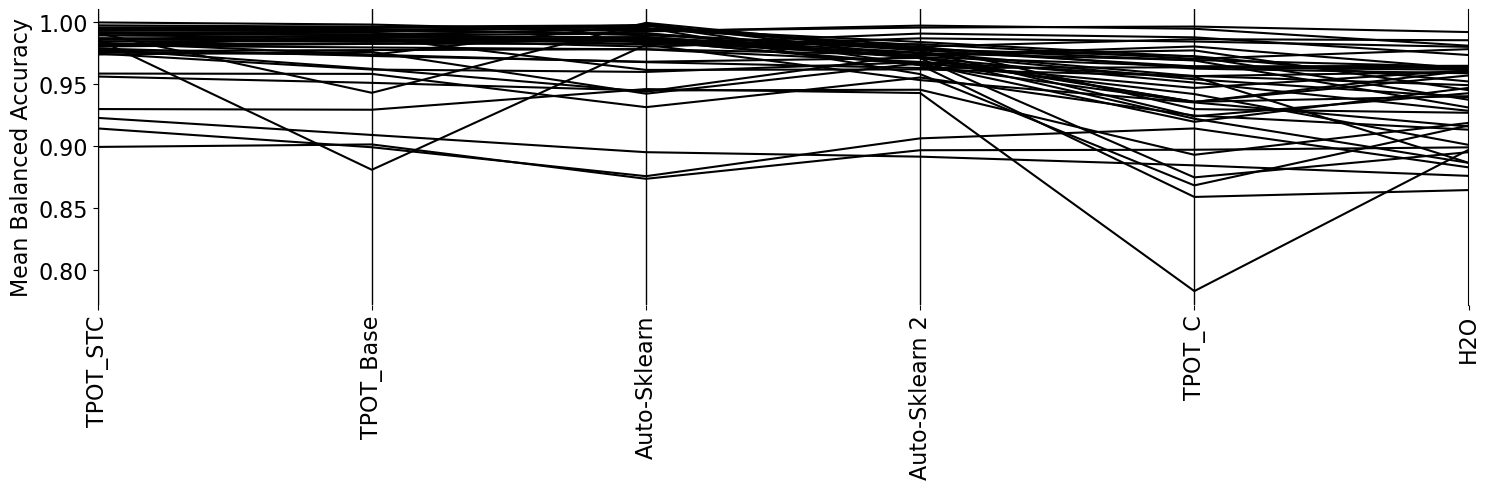

<Figure size 640x480 with 0 Axes>

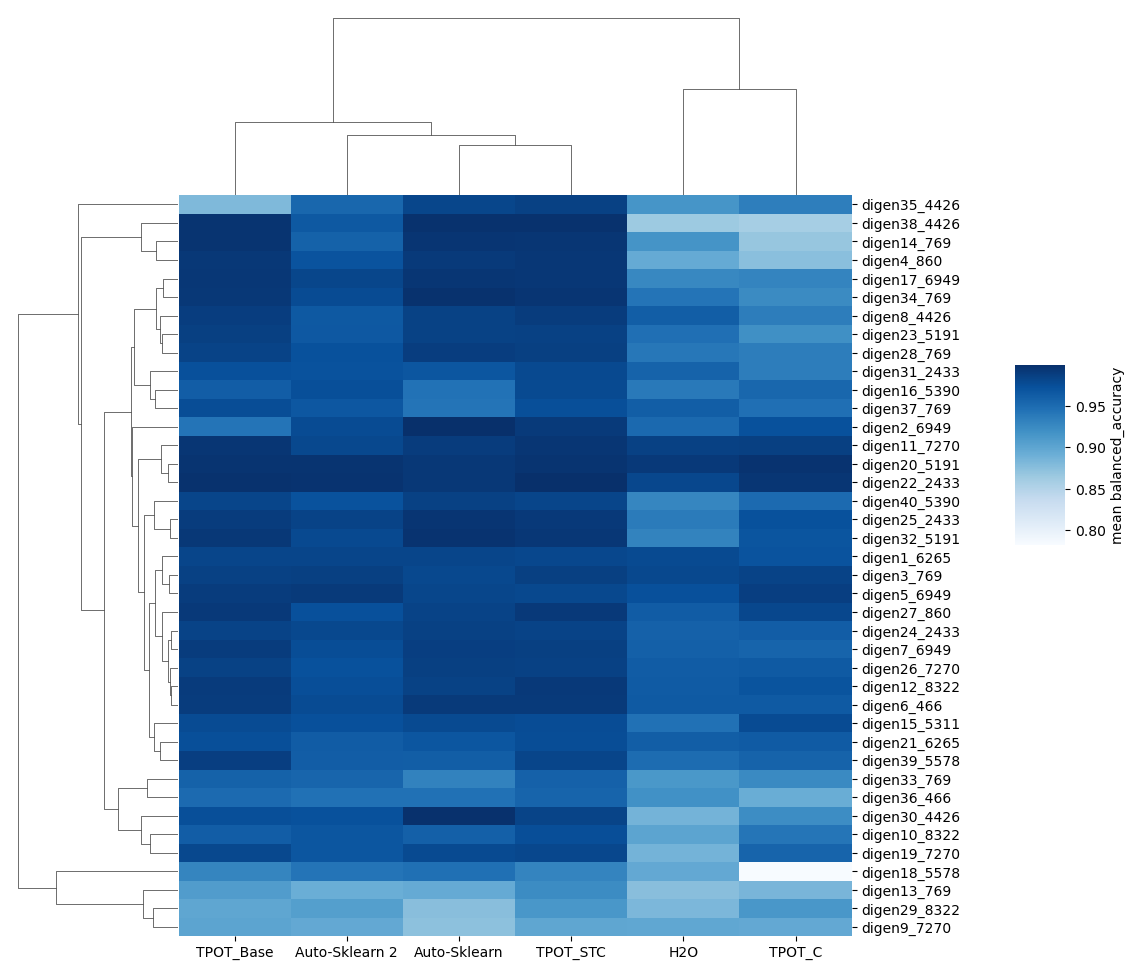

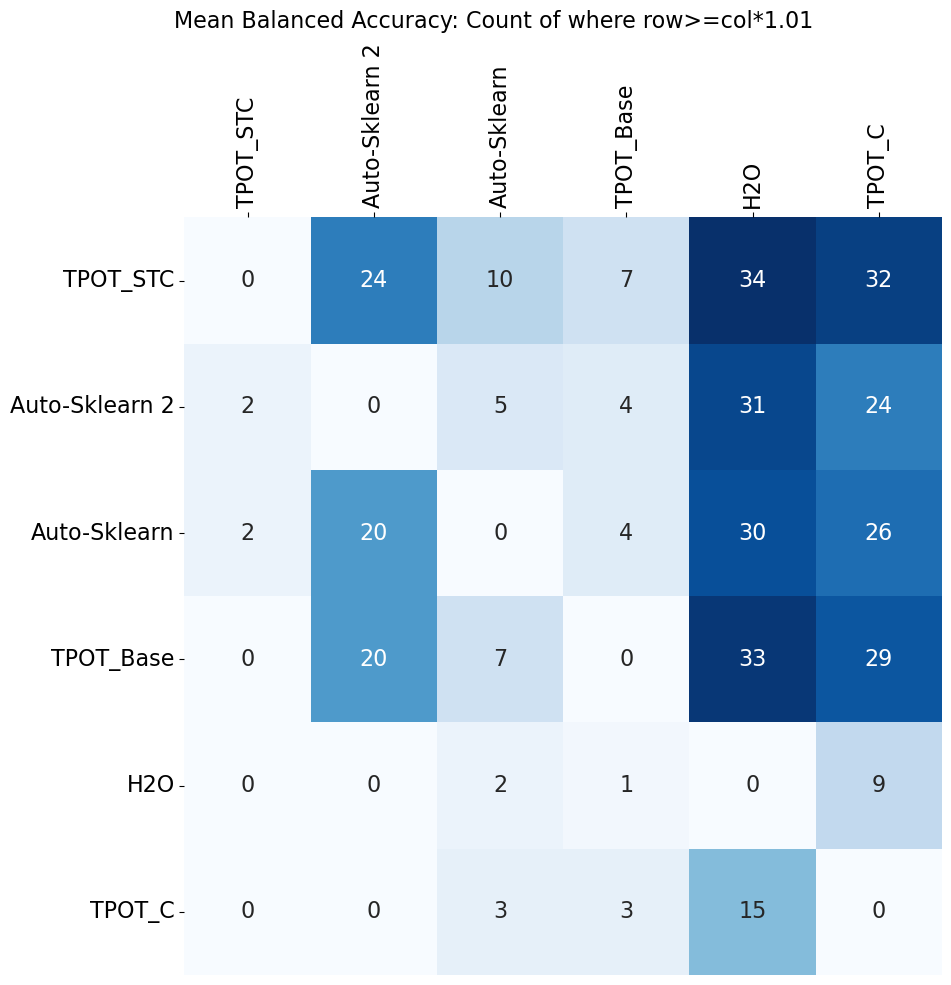

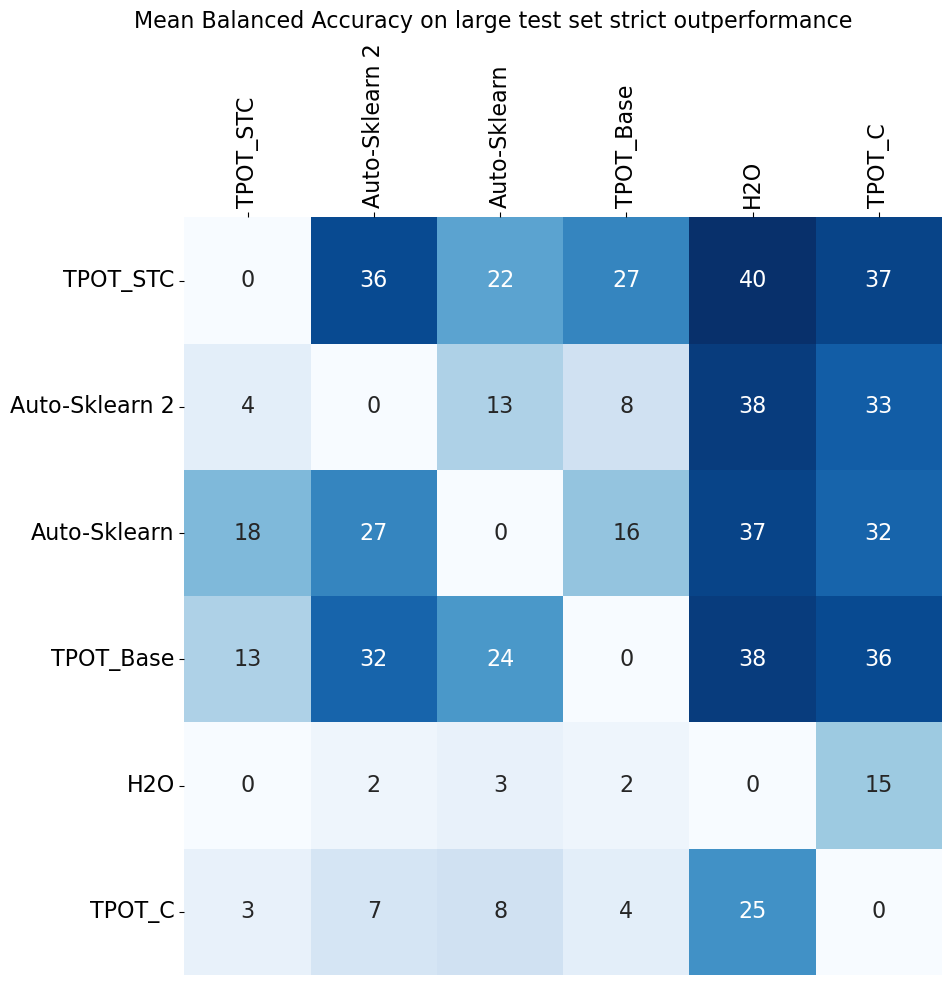

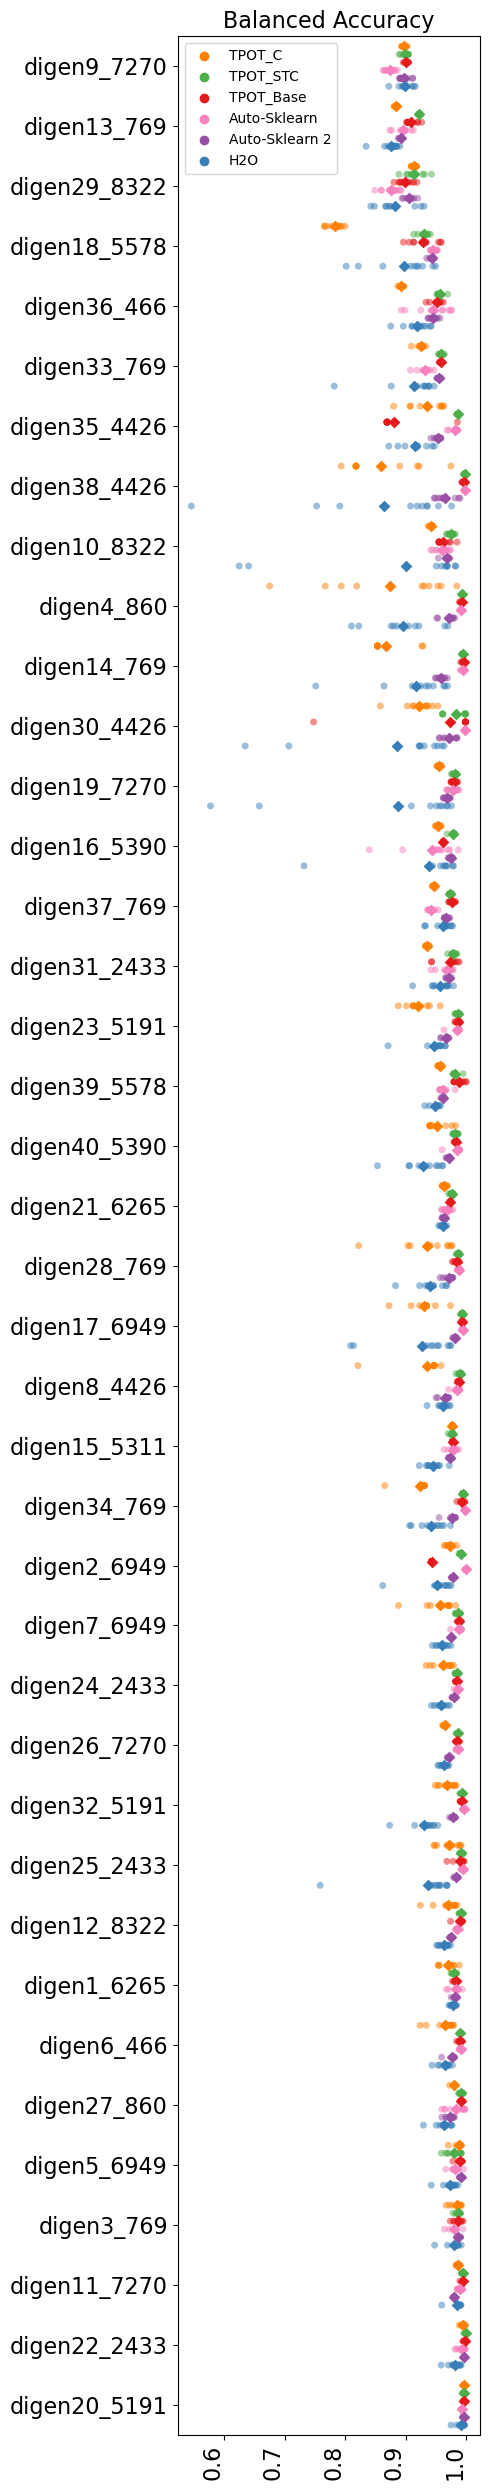

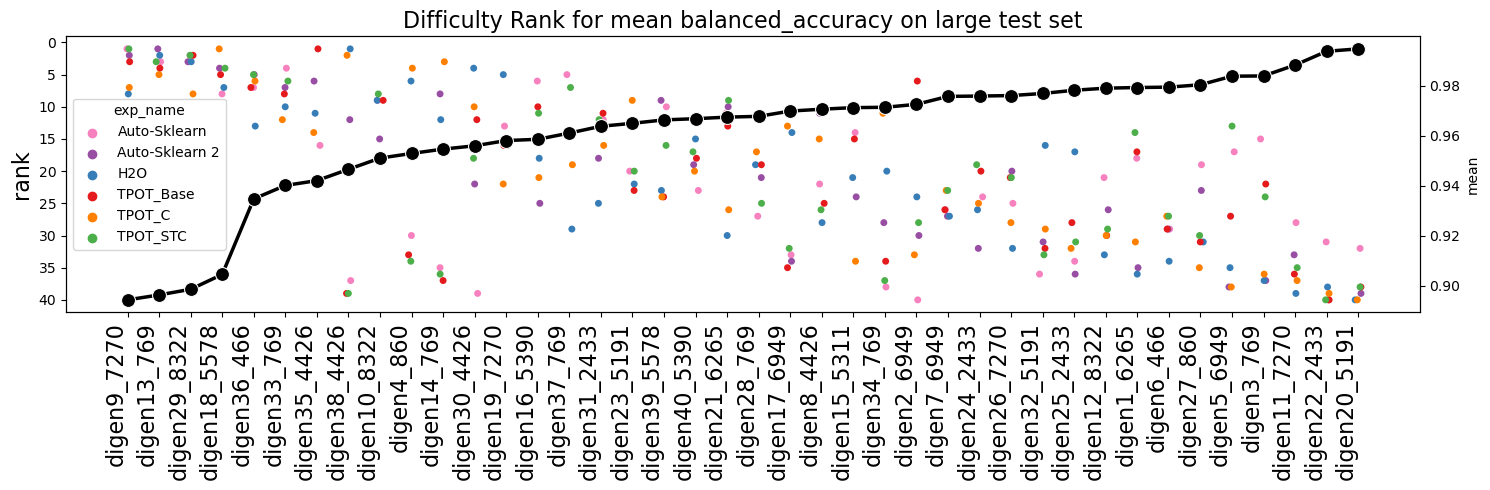

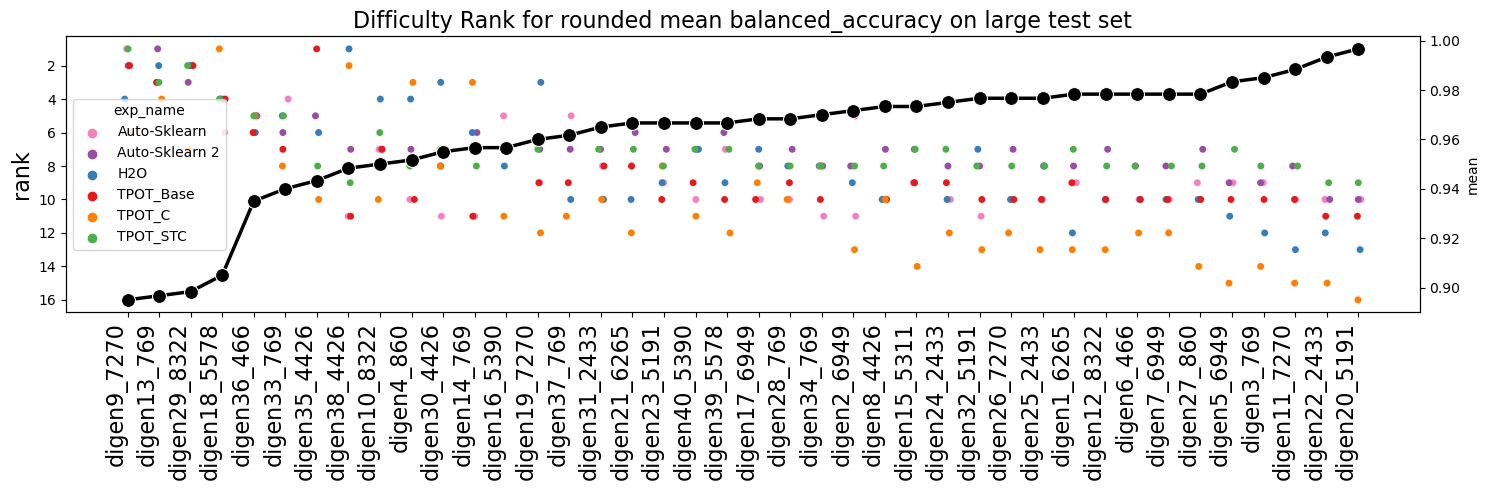

In [2]:
def get_summary_stats(all_df, noises, metric):
    metric_summary = all_df.groupby(['dataset', 'exp_name'])[metric].describe().reset_index()
    metric_summary_y_no_noise = all_df.groupby(['dataset', 'exp_name'])[metric+"_y_no_noise"].describe().reset_index()
    
    if metric + "_original" in all_df.columns:
        metric_summary_original = all_df.groupby(['dataset', 'exp_name'])[metric + "_original"].describe().reset_index()

    for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
        if metric + "_original" in all_df.columns:
            metric_summary[f'{col}_original'] = metric_summary_original[col]
        
        metric_summary[f'{col}_y_no_noise'] = metric_summary_y_no_noise[col]

    metric_summary = metric_summary.merge(noises, on='dataset')

    return metric_summary

#balanced Accuracy
for metric, name in zip(['auroc', 'auprc', 'balanced_accuracy',], ['AUROC', 'AUPRC','Balanced Accuracy']):#zip(['auroc', 'auprc', 'f1_score', 'balanced_accuracy', 'accuracy'], ['AUROC', 'AUPRC', 'F1 Score', 'Balanced Accuracy', 'Accuracy']):

    df_summary = get_summary_stats(all_df, noises, metric)
    df_summary['mean_rank'] = df_summary.groupby(['dataset'])['mean_y_no_noise'].rank(ascending=False, method='dense')

    df_summary['mean_y_no_noise_rounded'] = df_summary['mean_y_no_noise'].round(2)
    df_summary['rounded_mean_rank'] = df_summary.groupby(['dataset'])['mean_y_no_noise_rounded'].rank(ascending=False, method='dense')

    mean_sorted_exp_names = df_summary.groupby(['exp_name'])['mean_y_no_noise'].describe().reset_index().sort_values('mean',ascending=False)['exp_name'].values    
    std_sorted_exp_names =  df_summary.groupby(['exp_name'])['std_y_no_noise'].describe().reset_index().sort_values('mean',ascending=True)['exp_name'].values
    rank_sorted_exp_names = df_summary.groupby(['exp_name'])['mean_rank'].describe().reset_index().sort_values('mean',ascending=True)['exp_name'].values



    #############
    # 1x2 boxplot of mean, std
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(f"Mean {name}", fontsize=16)

    ax = sns.boxplot(x="exp_name", y="mean_y_no_noise", data=df_summary,notch=True, order=mean_sorted_exp_names, ax=axes[0], palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
    ax.set_ylabel(f"{name}", fontsize=16)
    ax.set_xlabel('')
    

    # ax = sns.boxplot(x="exp_name", y="mean_rank", data=df_summary, notch=True, order=rank_sorted_exp_names, ax=axes[1], palette=palette)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    # ax.set_ylabel(f"Rank", fontsize=16)
    # ax.invert_yaxis()
    # ax.set_xlabel('')

    ax = sns.boxplot(x="exp_name", y="std_y_no_noise", data=df_summary,notch=True, order=std_sorted_exp_names, ax=axes[1], palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
    ax.set_ylabel('Standard Deviation', fontsize=16)
    ax.set_xlabel('')
    if save_figs_folder is not None:
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_boxplot.pdf", bbox_inches='tight')
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_boxplot.svg", bbox_inches='tight')


    # rank
    plt.figure()
    ax = sns.boxplot(x="exp_name", y="mean_rank", data=df_summary, notch=True, order=rank_sorted_exp_names, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_ylabel(f"Rank", fontsize=16)
    ax.invert_yaxis()
    ax.set_xlabel('')
    if save_figs_folder is not None:
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_mean_rank_box.pdf", bbox_inches='tight')
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_mean_rank_box.svg", bbox_inches='tight')


    #mean rank
    plt.figure()
    ax = sns.boxplot(x="exp_name", y="rounded_mean_rank", data=df_summary, notch=True, order=rank_sorted_exp_names, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_ylabel(f"Rank", fontsize=16)
    ax.invert_yaxis()
    ax.set_xlabel('')
    if save_figs_folder is not None:
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_rounded_mean_rank_box.pdf", bbox_inches='tight')
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_rounded_mean_rankk_box.svg", bbox_inches='tight')

    # Box plot of difficulty per dataset
    plt.figure(figsize=(15,5))
    df_summary['dataset_rank'] = df_summary.groupby(['exp_name'])['mean_y_no_noise'].rank(ascending=True)
    dataset_rank_order = df_summary.groupby(['dataset'])['dataset_rank'].describe().reset_index().sort_values('mean',ascending=True)['dataset'].values
    ax = sns.stripplot(x="dataset", y="dataset_rank", data=df_summary, order=dataset_rank_order, hue="exp_name", palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_ylabel('rank', fontsize=16)
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_title(f"Difficulty Rank for mean {metric} on large test set", fontsize=16)
    if save_figs_folder is not None:
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_difficulty.pdf", bbox_inches='tight')
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_dataset_difficulty.svg", bbox_inches='tight')

    # boxplot of original score is available
    if 'mean_original' in df_summary.columns:
        mean_original_sorted_exp_names = df_summary.groupby(['exp_name'])['mean_original'].describe().reset_index().sort_values('mean',ascending=False)['exp_name'].values
        plt.figure()
        ax = sns.boxplot(x="exp_name", y="mean_original", data=df_summary, notch=True, order=mean_original_sorted_exp_names , palette=palette)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
        plt.title(f"Mean {name} on original test set")
        plt.ylabel(name, fontsize=16)
        ax.set_xlabel('')
        if save_figs_folder is not None:
            plt.savefig(f"{save_figs_folder}/{metric}_mean_original_boxplot.pdf", bbox_inches='tight')
            plt.savefig(f"{save_figs_folder}/{metric}_mean_original_boxplot.svg", bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(15, 5))
    ax = make_parallel_coordinates_plot(df_summary, index="dataset", columns="exp_name", values='mean_y_no_noise', ax=ax)
    #plt.title(f"Mean {name} on large test set",fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.ylabel(f"Mean {name}", fontsize=16)
    if save_figs_folder is not None:
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_parallel_coordinates.pdf", bbox_inches='tight')
        fig.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_parallel_coordinates.svg", bbox_inches='tight')


    #Score heatmap
    fig = plt.figure()
    df_piv = df_summary.pivot('dataset', columns='exp_name', values='mean_y_no_noise')
    fig = sns.clustermap(df_piv, cmap='Blues',
                                yticklabels=1, xticklabels=1, row_cluster=True,
                                #figsize=(7,10),
                                col_cluster=True, annot_kws={"size": 26}, cbar_kws={'label': "mean " + metric})
    fig.ax_heatmap.set_xlabel('')
    fig.ax_heatmap.set_ylabel('')
    col = fig.cax.get_position()
    fig.cax.set_position([col.x0 + 1, col.y0 - 0.35, col.width, col.height])
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_heatmap.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_heatmap.svg", bbox_inches='tight')

    ### wins plot
    fig = plt.figure(figsize=(10, 10))
    algorithms = ['TPOT_STC', 'Auto-Sklearn 2','Auto-Sklearn', 'TPOT_Base', 'H2O','TPOT_C',  ] #df_summary['exp_name'].unique()          
    wins = pd.DataFrame(index=algorithms, columns=algorithms)
    for alg1, alg2 in product(algorithms, algorithms):
        wins.loc[alg1, alg2] = (df_piv[alg1] >= df_piv[alg2]*1.01).sum()
    ax = sns.heatmap(data=wins.astype(int), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.yticks(rotation=0)
    #plt.title(f"Mean {name} : column > row*0.99 ", fontsize=16)
    fig.suptitle(f"Mean {name}: Count of where row>=col*1.01", fontsize=16)
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_wins_p101_heatmap.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_wins_p101_heatmap.svg", bbox_inches='tight')



    #wins strict outperform 
    fig = plt.figure(figsize=(10, 10))            
    wins = pd.DataFrame(index=algorithms, columns=algorithms)
    for alg1, alg2 in product(algorithms, algorithms):
        wins.loc[alg1, alg2] = (df_piv[alg1] > df_piv[alg2]).sum()
    ax = sns.heatmap(data=wins.astype(int), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.yticks(rotation=0)
    fig.suptitle(f"Mean {name} on large test set strict outperformance", fontsize=16)
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strict_wins_heatmap.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strict_wins_heatmap.svg", bbox_inches='tight')


    #stripplot of score by dataset
    fig = plt.figure(figsize=(5,25))

    hue_order = ["TPOT_C","TPOT_STC", 'TPOT_Base' ,'Auto-Sklearn' ,'Auto-Sklearn 2', 'H2O']

    dataset_means = df_summary.groupby(['dataset'])['mean_y_no_noise'].describe().reset_index()
    dataset_rank_order = dataset_means.sort_values('mean',ascending=True)['dataset'].values

    ax = sns.stripplot(y="dataset", x=f'{metric}_y_no_noise', data=all_df, order=dataset_rank_order, hue="exp_name", palette=palette, alpha=0.5, size=5, hue_order =hue_order,dodge=True, jitter=False)
    ax = sns.stripplot(y="dataset", x="mean_y_no_noise", data=df_summary, order=dataset_rank_order, hue="exp_name", palette=palette, marker='D',size=6, hue_order =hue_order,dodge=True, jitter=False)
    sns.move_legend(ax, "center right")

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:6], labels[0:6])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
    ax.set_title(f"{name}", fontsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_title(f"{metric}", fontsize=16)
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strip.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strip.svg", bbox_inches='tight')




    #mean score lineplot + rank stripplot
    fig = plt.figure(figsize=(15,5))
    df_summary['dataset_rank'] = df_summary.groupby(['exp_name'])['mean_y_no_noise'].rank(ascending=True, method='dense')

    dataset_means = df_summary.groupby(['dataset'])['mean_y_no_noise'].describe().reset_index()
    dataset_rank_order = dataset_means.sort_values('mean',ascending=True)['dataset'].values
    dataset_means = dataset_means.sort_values('dataset',  key=lambda col: col.map(
                                                                    {dset: i for i, dset in enumerate(dataset_rank_order)}))


    ax = sns.stripplot(x="dataset", y="dataset_rank", data=df_summary, order=dataset_rank_order, hue="exp_name", palette=palette)
    sns.move_legend(ax, "center left")

    ax2 = plt.twinx()
    ax2 = sns.lineplot(x='dataset', y='mean', data=dataset_means, sort=False, color='black', marker='o', markersize=10, linewidth=2.5, ax=ax2)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_ylabel('rank', fontsize=16)
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_title(f"Difficulty Rank for mean {metric} on large test set", fontsize=16)
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strip_line_rank.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_mean_y_no_noise_strip_line_rank.svg", bbox_inches='tight')

    
    plt.show()


    # rounded mean score lineplot + rank stripplot
    fig = plt.figure(figsize=(15,5))
    df_summary['dataset_rank'] = df_summary.groupby(['exp_name'])['mean_y_no_noise_rounded'].rank(ascending=True , method='dense')

    dataset_means = df_summary.groupby(['dataset'])['mean_y_no_noise_rounded'].describe().reset_index()
    dataset_rank_order = dataset_means.sort_values('mean',ascending=True)['dataset'].values
    dataset_means = dataset_means.sort_values('dataset',  key=lambda col: col.map(
                                                                    {dset: i for i, dset in enumerate(dataset_rank_order)}))


    ax = sns.stripplot(x="dataset", y="dataset_rank", data=df_summary, order=dataset_rank_order, hue="exp_name", palette=palette)
    sns.move_legend(ax, "center left")

    ax2 = plt.twinx()
    ax2 = sns.lineplot(x='dataset', y='mean', data=dataset_means, sort=False, color='black', marker='o', markersize=10, linewidth=2.5, ax=ax2)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=16)
    ax.set_ylabel('rank', fontsize=16)
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_title(f"Difficulty Rank for rounded mean {metric} on large test set", fontsize=16)
    if save_figs_folder is not None:
        plt.savefig(f"{save_figs_folder}/{metric}_rounded_mean_y_no_noise_strip_line_rank.pdf", bbox_inches='tight')
        plt.savefig(f"{save_figs_folder}/{metric}_rounded_mean_y_no_noise_strip_line_rank.svg", bbox_inches='tight')
    plt.show()



In [5]:
all_df[all_df['dataset']=='digen29_8322'][['dataset','balanced_accuracy_y_no_noise']]

dataset  balanced_accuracy_y_no_noise
30    digen29_8322                      0.909584
70    digen29_8322                      0.888781
110   digen29_8322                      0.916268
150   digen29_8322                      0.903618
190   digen29_8322                      0.927799
...            ...                           ...
2230  digen29_8322                      0.910570
2270  digen29_8322                      0.913566
2310  digen29_8322                      0.894201
2350  digen29_8322                      0.919893
2390  digen29_8322                      0.904978

[60 rows x 2 columns]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  2  3  4  5  6 10 16 24 34 44]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  2  3  4  6  8 10 12 14 16 18 21 25]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 8]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


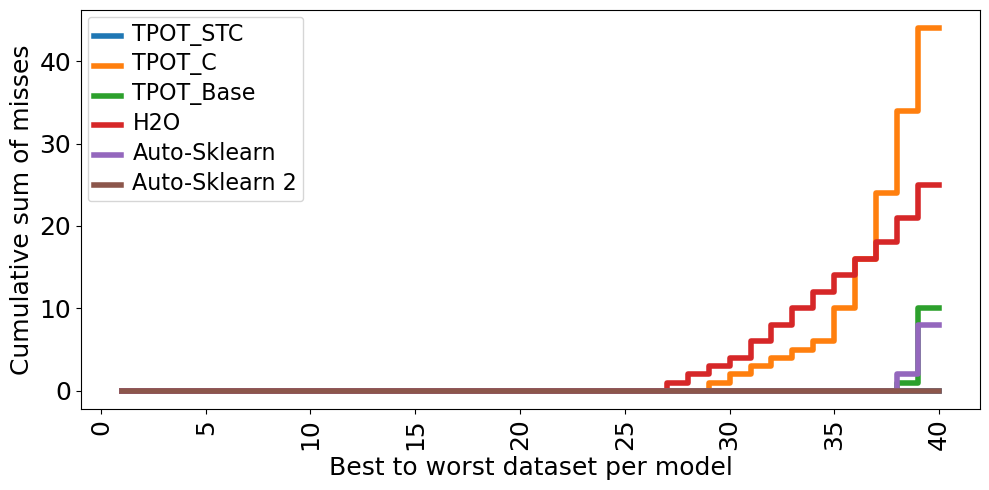

In [6]:
all_df['misses'] = all_df['auroc_y_no_noise'] < 0.95 #all_df['score'] < .95

grouped = all_df.groupby(['dataset', 'exp_name'])['misses'].sum().reset_index()

fig,ax = plt.subplots(figsize=(10,5))
sns.color_palette('colorblind')

for alg in all_df['exp_name'].unique():
        a=np.zeros(40)
        y = np.cumsum(sorted(grouped[grouped['exp_name']==alg]['misses'].tolist()))
        print(y)
        a[40-len(y):]=y
        #plt.plot(a, color=palette[alg])
        sns.lineplot(x=np.arange(40)+1,y=a,  drawstyle='steps-pre', label=alg, linewidth=4)

plt.xlabel("Best to worst dataset per model",fontsize=18)
plt.ylabel("Cumulative sum of misses",fontsize=18)
plt.xticks(rotation=90)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend


handles, labels = plt.gca().get_legend_handles_labels()
order = [4,2,3,0,5,1]
order = [5,4,3,]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.legend()

plt.setp(ax.get_legend().get_texts(), fontsize='16')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)
#plt.title("Percent runs AutoML was outperformed by at least one Optuna optimized method")
plt.show()



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5]),
 [Text(0, 0.5, 'digen13_769'),
  Text(0, 1.5, 'digen18_5578'),
  Text(0, 2.5, 'digen14_769'),
  Text(0, 3.5, 'digen35_4426'),
  Text(0, 4.5, 'digen38_4426'),
  Text(0, 5.5, 'digen9_7270'),
  Text(0, 6.5, 'digen4_860'),
  Text(0, 7.5, 'digen30_4426'),
  Text(0, 8.5, 'digen17_6949'),
  Text(0, 9.5, 'digen10_8322'),
  Text(0, 10.5, 'digen19_7270'),
  Text(0, 11.5, 'digen33_769'),
  Text(0, 12.5, 'digen25_2433'),
  Text(0, 13.5, 'digen28_769'),
  Text(0, 14.5, 'digen16_5390'),
  Text(0, 15.5, 'digen40_5390'),
  Text(0, 16.5, 'digen8_4426'),
  Text(0, 17.5, 'digen34_769'),
  Text(0, 18.5, 'digen5_6949'),
  Text(0, 19.5, 'digen12_8322'),
  Text(0, 20.5, 'digen6_466'),
  Text(0, 21.5, 'digen7_6949'),
  Text(0, 22.5, 'digen3

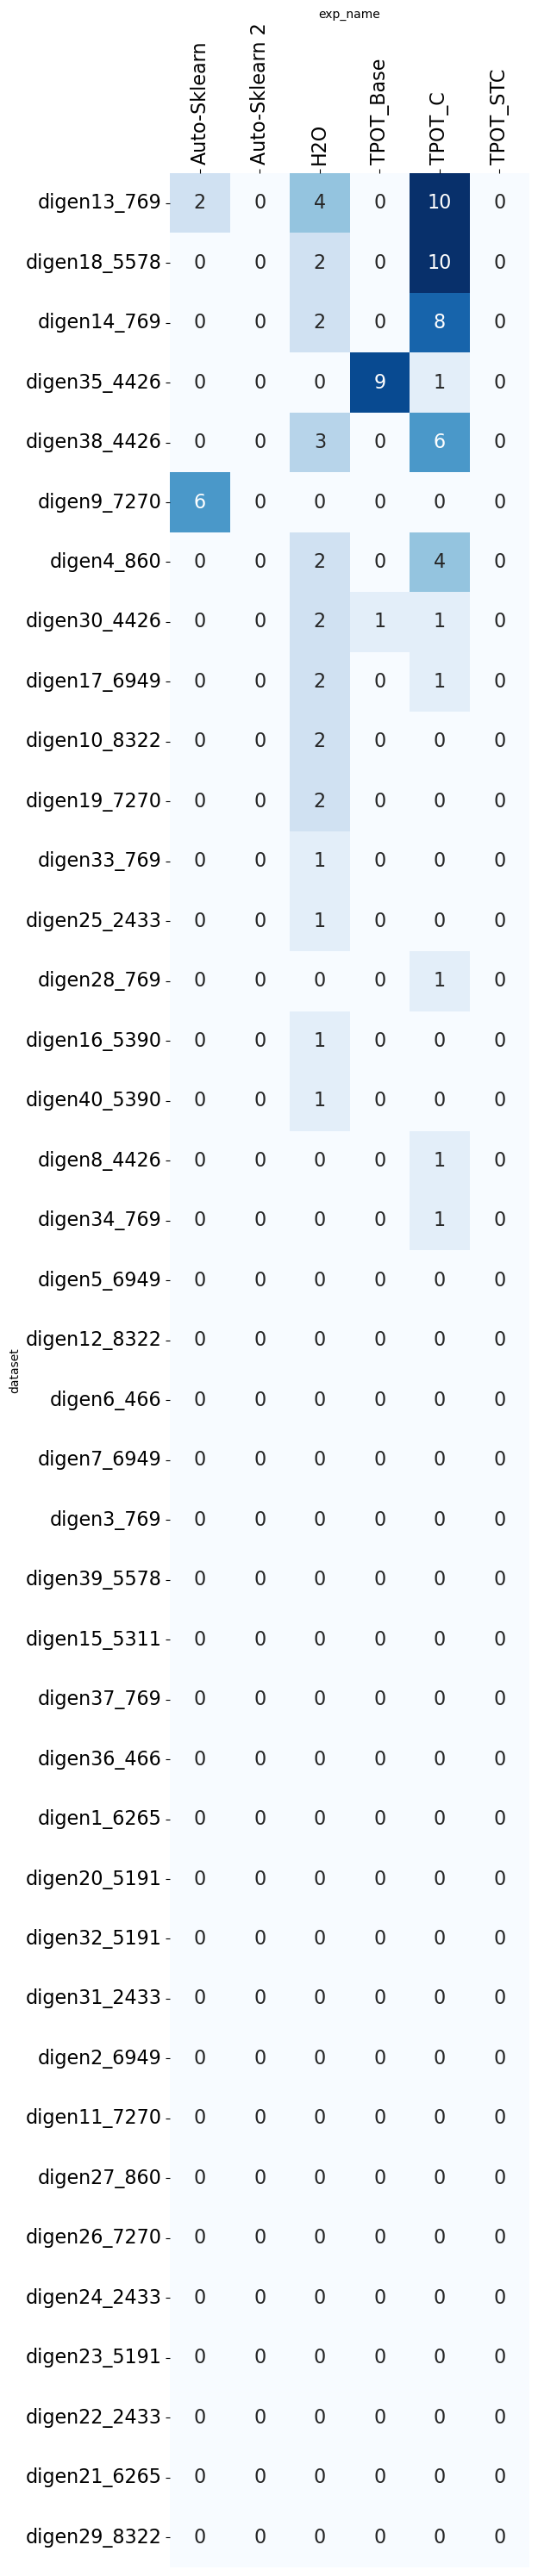

In [7]:
grouped_pv = grouped.pivot('dataset', columns='exp_name', values='misses')

#sort by sum
grouped_pv['sum'] = grouped_pv.sum(axis=1)
grouped_pv = grouped_pv.sort_values(by='sum', ascending=False)

grouped_pv.drop(columns=['sum'], inplace=True)

fig = plt.figure(figsize=(30, 30))
ax = sns.heatmap(data=grouped_pv.astype(int), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(rotation=0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Auto-Sklearn'),
  Text(0, 1.5, 'Auto-Sklearn 2'),
  Text(0, 2.5, 'H2O'),
  Text(0, 3.5, 'TPOT_Base'),
  Text(0, 4.5, 'TPOT_C'),
  Text(0, 5.5, 'TPOT_STC')])

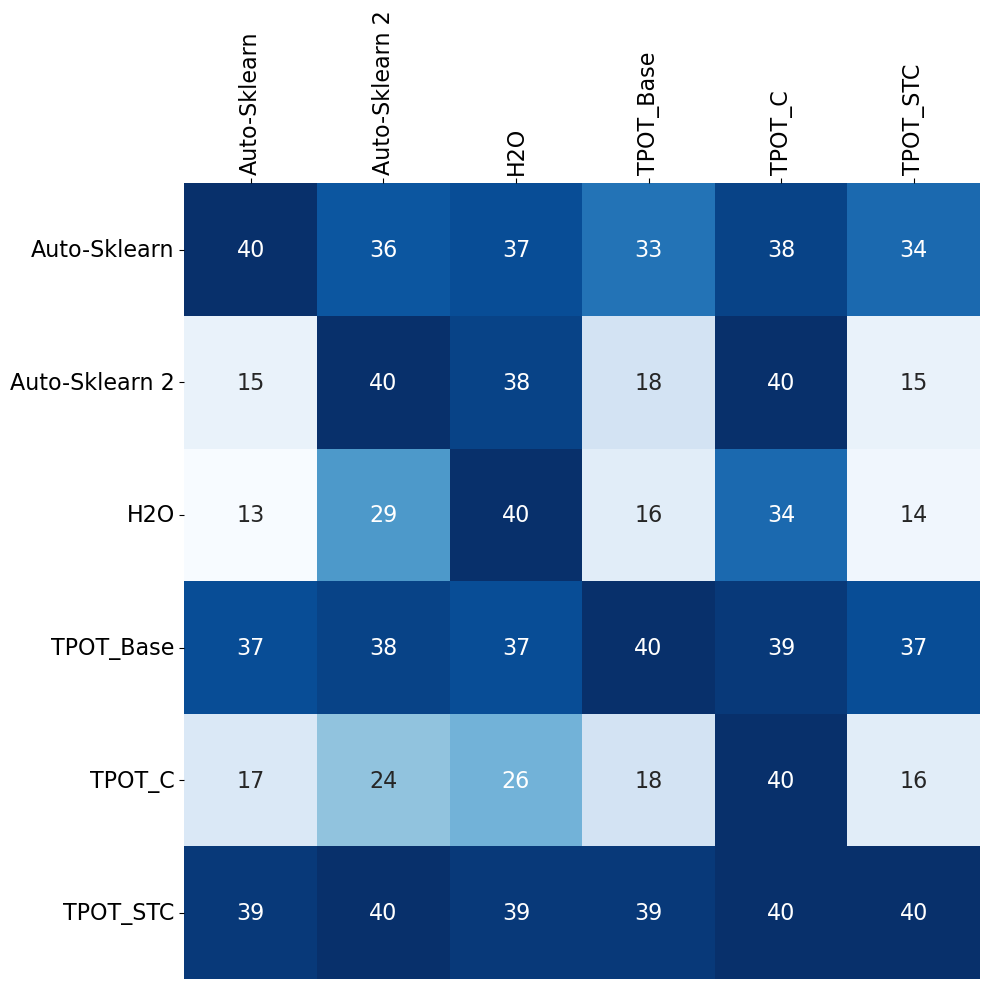

In [8]:


all_df0 = all_df[all_df['run']==0]

#all_df_piv = all_df0.pivot('dataset', columns='exp_name', values='score')#
all_df_piv = df_summary.pivot('dataset', columns='exp_name', values='max')

algorithms = df_summary['exp_name'].unique()
                
wins = pd.DataFrame(index=algorithms, columns=algorithms)

for alg1, alg2 in product(algorithms, algorithms):
    wins.loc[alg1, alg2] = (all_df_piv[alg1] > all_df_piv[alg2]*.99).sum()

fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=wins.astype(int), annot=True, cmap="Blues",cbar=False,square = True, annot_kws={"size": 16})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(rotation=0)